In [1]:
library(data.table)
library(stringr)
library(pheatmap)
library(ape)
library(ggplot2)
library(Rtsne)
library(sva)
library(VennDiagram)
library(readxl)
library(energy)
library(MASS)
library(quantreg)
library(limma)
library(Glimma)
library(edgeR)
library(RColorBrewer)
library(minerva)
library(dbscan)
library(amap)
library(NbClust)
library(apeglm)
library(gplots)
library(colorspace)
library(dendextend)
library(data.table)
library(topGO)
library(treemap)
library(ggbiplot)
library(factoextra)
library(ggrepel)
library(gridExtra)
library(cowplot)
library(ggpubr)

Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.
Loading required package: genefilter
Loading required package: BiocParallel
Loading required package: grid
Loading required package: futile.logger

Attaching package: ‘futile.logger’

The following object is masked from ‘package:mgcv’:

    scat


Attaching package: ‘VennDiagram’

The following object is masked from ‘package:ape’:

    rotate


Attaching package: ‘MASS’

The following object is masked from ‘package:genefilter’:

    area

Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess


---------------------
Welcome to dendextend version 1.13.4
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github pag

In [2]:
color_AD <- "#FF3300"
color_ND <- "blue"
color_CHC_H <- color_ND
color_CHC_M <- "#FFCC00"
color_CHC_L <- "#FF3300"
font_size <- 10
font_size_add <- 2

circle_size_1 <- 2
circle_size_2 <- 3

In [3]:
setwd("~/ownCloud/Meng/")

In [4]:
protein_info <- read.table("100_plus_results/Protein basic info.tsv", 
                           sep = "\t", header =TRUE, stringsAsFactors=F)

In [5]:
protein_info

protein,uniprot_accessions,gene,HUGO_gene
<chr>,<chr>,<chr>,<chr>
SLC12A2,P55011-3;P55011;G3XAL9,SLC12A2,SLC12A2
CASKIN1,Q8WXD9,CASKIN1,CASKIN1
GNG2,P59768;G3V3J9;G3V2N0,GNG2,GNG2
CARNS1,A5YM72;A5YM72-5;A5YM72-3;A5YM72-4,CARNS1,CARNS1
FH,P07954-2;P07954,FH,FH
EFHD2,Q96C19;H0Y4Y4,EFHD2,EFHD2
PCLO,Q9Y6V0-6;Q9Y6V0,PCLO,PCLO
HSPA1A;HSPA1B,P0DMV9;P0DMV8;A0A0G2JIW1;P0DMV8-2;V9GZ37,HSPA1A,HSPA1A
STIP1,P31948;P31948-2;P31948-3,STIP1,STIP1


In [6]:
load("100_plus_project/Metadata/metadata_clean_update20211215.Rdata")
metadata <- metadata_clean
colnames(metadata)

[1] "nbb"                                 "autopsy"                            
 [3] "sampleprepRandomization (4 batches)" "zmRandomization (10 batches)"       
 [5] "Autopsy_nr"                          "GROUP"                              
 [7] "Mass-Spec filenames (1)"             "Mass-Spec filenames (2)"            
 [9] "Diagnosis"                           "sex"                                
[11] "age"                                 "braak"                              
[13] "amyloid"                             "pmd"                                
[15] "ph"                                  "weight"                             
[17] "csf"                                 "apoe"                               
[19] "barcode"                             "Abeta"                              
[21] "APOE"

In [7]:
#sample_id_for_APOE <- read.table('/Users/zhangmeng/Downloads/sample_id.txt', header =TRUE,
#                                                    stringsAsFactors=F)
#
#sum(sample_id_for_APOE$sample_id %in% metadata$'Mass-Spec filenames (1)')
#
#sample_APOE <- metadata[which(metadata$'Mass-Spec filenames (1)' %in% sample_id_for_APOE$sample_id), ][c('nbb', 'Mass-Spec filenames (1)', "autopsy", 
#                                                                                                         "sex", "age", "GROUP", "braak", "Abeta", "APOE")]
#
#write.table(sample_APOE, 
#            file = "Temp_results/Sample_metadata_include_APOE_additional.tsv", sep = '\t',
#            col.names = TRUE, row.names = FALSE, quote = FALSE)

In [8]:
High_quality_protein_intensity_matrix <- read.table('R_workstation/100_plus_proteomic_DATA/High_quality_protein_intensity_matrix.tsv', header =TRUE,
                                                    stringsAsFactors=F, sep = "\t")
dim(High_quality_protein_intensity_matrix)

#metadata <- read_excel("100_plus_project/Metadata/2019_07_23_Proteomics_Metadata_forMeng_v3.xlsx",
#                       sheet=1,col_names=TRUE, na="NA")
#metadata <- as.data.frame(metadata)
#colnames(metadata)

names_sample <- as.array(colnames(High_quality_protein_intensity_matrix)[2:ncol(High_quality_protein_intensity_matrix)])
names_sample <- as.vector(apply(names_sample, 1, function(names){return (str_sub(names, 11))}))

filenames_map_index <- integer(length(names_sample))
for (i in 1:length(names_sample)){
    if ((names_sample[i] %in% metadata[,"Mass-Spec filenames (1)"]) | 
        (names_sample[i] %in% metadata[,"Mass-Spec filenames (2)"]))
        filenames_map_index[i] <- ifelse(length(which(metadata[,"Mass-Spec filenames (1)"] == names_sample[i]))==0,
                                     which(metadata[,"Mass-Spec filenames (2)"] == names_sample[i]), 
                                     which(metadata[,"Mass-Spec filenames (1)"] == names_sample[i]))
    else
        print("ERROR, file name not in metadata!")
}

#print(filenames_map_index)

metadata <- metadata[filenames_map_index, ][c("nbb", "autopsy", "sex", "age", "weight", "GROUP", "pmd", "braak", 
                                              "Abeta", "APOE")]
colnames(metadata) <- c("nbb", "autopsy", "sex", "age", "weight", "GROUP", "pmd", "braak", "amyloid", "apoe")
metadata$filenames <- names_sample

metadata$sex[(metadata$sex=='F') | (metadata$sex=='f')] <- "F"
metadata$sex[(metadata$sex=='M') | (metadata$sex=='m')] <- "M"
metadata$braak <- as.numeric(metadata$braak)
metadata$age <- as.numeric(metadata$age)


index_AD <- which(metadata$GROUP == "AD")
index_CHC <- which(metadata$GROUP == "CHC")
index_ND <- which(metadata$GROUP == "ND")
num_AD <- length(index_AD)
num_CHC <- length(index_CHC)
num_ND <- length(index_ND)

metadata[which((metadata$GROUP=="ND") & (is.na(metadata$braak))),]$braak <- median(metadata[index_ND,]$braak, na.rm = TRUE)

metadata$fBraak <- metadata$braak
metadata[which(metadata$braak == 0), ]$fBraak <- 1

metadata$cBraak <- as.numeric(lapply(metadata$braak, function(braak){if (braak==0 | braak==1 | braak==2)
                                                                return(1)
                                                          if (braak==3 | braak==4)
                                                                return(2)
                                                          if (braak==5 | braak==6)
                                                                return(3)}))

metadata[which((metadata$GROUP=="AD") & (is.na(metadata$amyloid))),]$amyloid <- 3
metadata[which((metadata$GROUP=="ND") & (is.na(metadata$amyloid))),]$amyloid <- 1

metadata$O_amyloid <- sapply(metadata$amyloid, function(x){
    if(x == 0){
        return("O")
    }
    if(x == 1){
        return("A")
    }
    if(x == 2){
        return("B")
    }
    if(x == 3){
        return("C")
    }
})

get_mod <- function(apoe){
    apoe_count <- as.matrix(table(apoe))
    return (rownames(apoe_count)[which.max(apoe_count)])
}

metadata[which((metadata$GROUP=="ND") & (is.na(metadata$apoe))),]$apoe <- get_mod(metadata[index_ND,]$apoe)

metadata$apoe_OR <- as.numeric(metadata$apoe)

metadata[which(metadata$apoe %in% c(22)),]$apoe_OR <- 0.24
metadata[which(metadata$apoe %in% c(23, 32)),]$apoe_OR <- 0.5
metadata[which(metadata$apoe %in% c(33)),]$apoe_OR <- 1.0
metadata[which(metadata$apoe %in% c(24, 42)),]$apoe_OR <- 3.2
metadata[which(metadata$apoe %in% c(34, 43)),]$apoe_OR <- 5.5
metadata[which(metadata$apoe %in% c(44)),]$apoe_OR <- 20.6

convert_time_2_numeric <- function(pmd){
    if (is.na(pmd))
        return (NA)
    else
        return (as.numeric(str_sub(pmd, start=1, end=2))+as.numeric(str_sub(pmd, 4))/60)
}

metadata$pmd_numeric <- apply(metadata["pmd"], 1, convert_time_2_numeric)
metadata[which(is.na(metadata$pmd_numeric)),]$pmd_numeric <- median(metadata$pmd_numeric, na.rm = TRUE)

MMSE_data <- read_excel("100_plus_project/Metadata/20190513_Centenarians_info.xlsx",sheet=1,col_names=TRUE, na="NA")
#MMSE_data
MMSE_data <- MMSE_data[c('NBB', 'MMSE_LAST_AVAILABLE')]
#nrow(MMSE_data)

metadata$MMSE <- rep(NA, nrow(metadata))

for (i in 1:nrow(metadata)){
    if (metadata[i,]$GROUP == "CHC"){
        metadata[i,]$MMSE <- MMSE_data[which(MMSE_data$NBB == metadata[i,]$nbb),]$MMSE_LAST_AVAILABLE
    }
}

metadata$MMSE <- as.numeric(metadata$MMSE)

[1] 3448  191

In [9]:
table(metadata$braak, metadata$GROUP, useNA = "ifany")

   
    AD CHC ND
  0  0   0  6
  1  0   1 22
  2  0   6 17
  3  0  24  8
  4 20  14  0
  5 43   4  0
  6 25   0  0

In [13]:
#write.table(metadata[, c("nbb", "autopsy", "sex", "age", "GROUP", "braak", "amyloid", "apoe", "filenames")], 
#            file = "Temp_results/Sample_metadata_include_APOE.tsv", sep = '\t',
#            col.names = TRUE, row.names = FALSE, quote = FALSE)

In [9]:
cal_sample_batch_index <- function(sample_names){
    sample_index <- apply(as.data.frame(sample_names), 1, str_sub, -3)
    for (i in 1:length(sample_index)){
        sample_index[i] <- gsub("_", "0", sample_index[i])
    }
    sample_index <- as.numeric(sample_index)
    sample_index <- (sample_index - 1) %/% 8
    extra_batch <- max(sample_index, na.rm=TRUE) + 1
    sample_index[is.na(sample_index)] <- extra_batch
    return(sample_index)
}

protein_intensity_combat <- ComBat(dat=log2(as.matrix(High_quality_protein_intensity_matrix[,-1])), 
                                     batch=cal_sample_batch_index(metadata$filenames), mod=NULL, par.prior=TRUE, prior.plots=FALSE)
rownames(protein_intensity_combat) <- High_quality_protein_intensity_matrix$protein

Warning message in cal_sample_batch_index(metadata$filenames):
“NAs introduced by coercion”Found29batches
Adjusting for0covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data



In [10]:
cal_ANOVA_test <- function(variable, group){
    pdata <- data.frame(variable=as.numeric(drop(t(variable))), group=factor(group))
    test_anova <- oneway.test(variable~group, data=pdata, var.equal=F)
    return(test_anova$p.value)
}

lm_sig_test <- function(re_variable, exp_variable){
    lm_data <- data.frame(re=as.numeric(re_variable), exp=as.numeric(exp_variable))
    fit_lm <- lm(re~exp, data = lm_data)
    #F <- summary(fit_lm)$fstatistic
    #return(pf(F[1], F[2], F[3], lower.tail = FALSE))
    return(summary(fit_lm)$coefficients[2,][c(1,4)])
}

cal_effect_size_mmd_median <- function(protein_intens, braak){
    intens <- numeric(0)
    for(i in sort(unique(braak))){
        intens <- c(intens, median(protein_intens[which(braak == i)]))
    }
    
    if(which.max(intens) > which.min(intens)) 
        return(log2(max(intens)/min(intens)))
    else
        return(log2(min(intens)/max(intens)))
}

cal_median_for_stage <- function(protein_intens, braak){
    intens <- numeric(0)
    for(i in sort(unique(braak))){
        intens <- c(intens, median(protein_intens[which(braak == i)]))
    }
    return(intens)
}

cal_mean_for_stage <- function(protein_intens, braak){
    intens <- numeric(0)
    for(i in sort(unique(braak))){
        intens <- c(intens, mean(protein_intens[which(braak == i)]))
    }
    return(intens)
}

In [11]:
cal_PC1_for_stage <- function(protein_intens, braak){
    intens <- NULL
    for(i in sort(unique(braak))){
        intens <- cbind(intens, 
                    prcomp(protein_intens[, which(braak == i)], center = TRUE, scale = TRUE)$x[,1])
    }
    return(intens)
}

In [12]:
cal_median_for_age <- function(protein_intens, age){
    intens <- numeric(0)
    for(i in sort(unique(age))){
        intens <- c(intens, median(protein_intens[which(age == i)]))
    }
    return(intens)
}

In [13]:
get_sig_protein <- function(proteins){
    single_proteins <- vector()
    for(i in proteins){
        single_proteins <- c(single_proteins, unlist(strsplit(i, split = ";")))
    }
    
    return(single_proteins)
}

In [14]:
get_single_protein <- function(proteins){
    single_proteins <- proteins[-grep(";", proteins)]
    return(single_proteins)
}

In [15]:
get_first_protein <- function(proteins){
    single_proteins <- vector()
    for(i in proteins){
        #print(i)
        #print(unlist(strsplit(i, split = ";"))[1])
        single_proteins <- c(single_proteins, unlist(strsplit(i, split = ";"))[1])
    }
    return(single_proteins)
}

In [16]:
get_first_unique_protein <- function(proteins){
    existed <- get_single_protein(proteins)
    
    single_proteins <- vector()
    for(i in proteins){
        sub_proteins <- unlist(strsplit(i, split = ";"))
        if(length(sub_proteins) == 1)
            single_proteins <- c(single_proteins, sub_proteins)
        else{
            present <- TRUE
            for(j in sub_proteins){
                if(!(j %in% existed)){
                    existed <- c(existed, j)
                    single_proteins <- c(single_proteins, j)
                    present <- FALSE
                    break
                }
            }
            if(present){
                single_proteins <- c(single_proteins, i)
            }
        }
    }
    
    real_single_proteins <- get_first_protein(single_proteins)
    
    return(real_single_proteins)
    
    
}

In [189]:
GOterm_query_test_table <- function(protein_list, gene_list, ontology, algorithm = "classic", statistic = "fisher", 
                         annot = annFUN.gene2GO, gene2GO = geneSymbol2go_list){
    
    GOdata <- new("topGOdata",
                  ontology = ontology,
                  allGenes=gene_list,
                  annot=annot, 
                  gene2GO=gene2GO,
                  nodeSize=5
                 )
    
    allGO =usedGO(object = GOdata)
    
    result <- runTest(GOdata, 
                      algorithm = algorithm,
                      statistic = statistic)
    
    allRes <- as.data.frame(GenTable(GOdata, Fisher = result, ranksOf = "Fisher", 
                                     topNodes = length(allGO), numChar = 1000), stringsAsFactors = FALSE)
    
    allRes$Fisher <- as.numeric(allRes$Fisher)
    if(length(which(is.na(allRes$Fisher))) > 0)
        allRes[is.na(allRes$Fisher), ]$Fisher <- 1.0e-31
    
    allRes <- subset(allRes, Annotated < 100)
                      
    FDR <- p.adjust(p = as.numeric(allRes[,"Fisher"]), method="BH")
    allRes <- cbind(allRes, FDR)
    
    sig_Res <- subset(allRes, FDR <= 0.1)
    
    if(nrow(sig_Res) == 0)
        return("Can not find significant GO pathway in this cluster!")
    
    allGO = genesInTerm(GOdata)
    sig_GO <- allGO[names(allGO) %in% sig_Res$GO.ID]
    sig_GO_protein <- lapply(sig_GO, function(x) x[x %in% protein_list])
    sig_Res$proteins <- NA

    for(i in 1:nrow(sig_Res)){
        sig_Res[i, ]$proteins <- paste(unlist(sig_GO_protein[sig_Res[i, ]$GO.ID]), collapse = ', ')
    }
    
    return(sig_Res)
}

In [190]:
backgroud_protein_list <- unique(get_first_protein(High_quality_protein_intensity_matrix$protein))

length(backgroud_protein_list)

geneSymbol2go <- fread('awk \'{print $3 "," $4}\' R_workstation/100_plus_proteomic_data_Analysis/goa_human.gaf | grep "GO:"', header=FALSE, sep=",")
geneSymbol2go_list <- by(geneSymbol2go$V2, geneSymbol2go$V1, function(x) as.character(x))

go2geneSymbol_list <- by(geneSymbol2go$V1, geneSymbol2go$V2, function(x) as.character(x))

[1] 3102

In [118]:
write.table(backgroud_protein_list, 
            file = "Temp_results/Backgroud_protein_list_20220715.tsv", sep = '\t',
            col.names = TRUE, row.names = FALSE, quote = FALSE)

In [17]:
#################Differentially expressed proteins analysis###############

In [17]:
Braak_test_index <- which((metadata$GROUP != "CHC"))
length(Braak_test_index)

protein_intensity_combat_nonlog <- 2^protein_intensity_combat

[1] 141

In [18]:
pathology_related_proteins_ANOVA <- as.data.frame(apply(protein_intensity_combat[, Braak_test_index], 1, 
                                                        cal_ANOVA_test, metadata[Braak_test_index, ]$fBraak))
colnames(pathology_related_proteins_ANOVA) <- c("p_value")
pathology_related_proteins_ANOVA$adjusted_p_value <- p.adjust(pathology_related_proteins_ANOVA$p_value,
                                                              method="BH")

pathology_related_proteins_ANOVA$effect_size <- apply(protein_intensity_combat_nonlog[, Braak_test_index], 1, 
                                                      cal_effect_size_mmd_median, metadata[Braak_test_index, ]$fBraak)
#pathology_related_proteins_ANOVA$Gene <- get_first_unique_protein(High_quality_protein_intensity_matrix$protein)

pathology_related_proteins_lm <- as.data.frame(t(apply(protein_intensity_combat[, Braak_test_index], 1, 
                                                       lm_sig_test, metadata[Braak_test_index,]$fBraak)))
colnames(pathology_related_proteins_lm) <- c("effect_size", "p_value")
pathology_related_proteins_lm$adjusted_p_value <- p.adjust(pathology_related_proteins_lm$p_value, 
                                                              method="BH")

#pathology_related_proteins_lm$effect_size <- apply(protein_intensity_combat_nonlog[, Braak_test_index], 1, 
#                                                      cal_effect_size_mmd_median, metadata[Braak_test_index, ]$fBraak)
#pathology_related_proteins_lm$Gene <- get_first_unique_protein(High_quality_protein_intensity_matrix$protein)

In [19]:
sig_index_lm <- which(pathology_related_proteins_lm$adjusted_p_value < 0.05)

In [20]:
top_percent_p <- 0.05
top_percent_lfc <- 0.05

down_index_ANOVA <- which(pathology_related_proteins_ANOVA$effect_size < 0)
top_down_ANOVA_lfc <- down_index_ANOVA[order(pathology_related_proteins_ANOVA[down_index_ANOVA, ]$effect_size)[1:round(length(down_index_ANOVA) * top_percent_lfc)]]
top_down_ANOVA_p <- down_index_ANOVA[order(pathology_related_proteins_ANOVA[down_index_ANOVA, ]$adjusted_p_value)[1:round(length(down_index_ANOVA) * top_percent_p)]]
top_down_ANOVA <- intersect(top_down_ANOVA_p, top_down_ANOVA_lfc)
length(top_down_ANOVA)

up_index_ANOVA <- which(pathology_related_proteins_ANOVA$effect_size > 0)
top_up_ANOVA_lfc <- up_index_ANOVA[order(pathology_related_proteins_ANOVA[up_index_ANOVA, ]$effect_size, decreasing = TRUE)[1:round(length(up_index_ANOVA) * top_percent_lfc)]]
top_up_ANOVA_p <- up_index_ANOVA[order(pathology_related_proteins_ANOVA[up_index_ANOVA, ]$adjusted_p_value)[1:round(length(up_index_ANOVA) * top_percent_p)]]
top_up_ANOVA <- intersect(top_up_ANOVA_p, top_up_ANOVA_lfc)
length(top_up_ANOVA)

down_index_lm <- which(pathology_related_proteins_lm$effect_size < 0)
top_down_lm_lfc <- down_index_lm[order(pathology_related_proteins_lm[down_index_lm, ]$effect_size)[1:round(length(down_index_lm) * top_percent_lfc)]]
top_down_lm_p <- down_index_lm[order(pathology_related_proteins_lm[down_index_lm, ]$adjusted_p_value)[1:round(length(down_index_lm) * top_percent_p)]]
top_down_lm <- intersect(top_down_lm_p, top_down_lm_lfc)
length(top_down_lm)

up_index_lm <- which(pathology_related_proteins_lm$effect_size > 0)
top_up_lm_lfc <- up_index_lm[order(pathology_related_proteins_lm[up_index_lm, ]$effect_size, decreasing = TRUE)[1:round(length(up_index_lm) * top_percent_lfc)]]
top_up_lm_p <- up_index_lm[order(pathology_related_proteins_lm[up_index_lm, ]$adjusted_p_value)[1:round(length(up_index_lm) * top_percent_p)]]
top_up_lm <- intersect(top_up_lm_p, top_up_lm_lfc)
length(top_up_lm)

[1] 13

[1] 28

[1] 30

[1] 37

In [21]:
topT_down_union <- union(top_down_ANOVA, top_down_lm)
topT_up_union <- union(top_up_ANOVA, top_up_lm)
length(topT_down_union)
length(topT_up_union)

topT_sig_index <- c(topT_down_union,topT_up_union)
length(topT_sig_index)

[1] 30

[1] 40

[1] 70

In [22]:
#write.table(pathology_related_proteins_lm[topT_down_union, ], 
#            file = "Pathology_related_down_regulation_proteins_with_pvalue.txt", 
#            col.names = TRUE, row.names = FALSE, quote = FALSE)

In [23]:
top_percent_p <- 0.20
top_percent_lfc <- 0.20

## Top down-regulating proteins ##
## Top down-regulating proteins ##

down_index_ANOVA <- which(pathology_related_proteins_ANOVA$effect_size < 0)

top_down_ANOVA_lfc <- down_index_ANOVA[order(pathology_related_proteins_ANOVA[down_index_ANOVA, ]$effect_size)[1:round(length(down_index_ANOVA) * top_percent_lfc)]]
top_down_ANOVA_p <- down_index_ANOVA[order(pathology_related_proteins_ANOVA[down_index_ANOVA, ]$adjusted_p_value)[1:round(length(down_index_ANOVA) * top_percent_p)]]

top_down_ANOVA <- intersect(top_down_ANOVA_p, top_down_ANOVA_lfc)
length(top_down_ANOVA)

up_index_ANOVA <- which(pathology_related_proteins_ANOVA$effect_size > 0)

top_up_ANOVA_lfc <- up_index_ANOVA[order(pathology_related_proteins_ANOVA[up_index_ANOVA, ]$effect_size, decreasing = TRUE)[1:round(length(up_index_ANOVA) * top_percent_lfc)]]
top_up_ANOVA_p <- up_index_ANOVA[order(pathology_related_proteins_ANOVA[up_index_ANOVA, ]$adjusted_p_value)[1:round(length(up_index_ANOVA) * top_percent_p)]]

top_up_ANOVA <- intersect(top_up_ANOVA_p, top_up_ANOVA_lfc)
length(top_up_ANOVA)

#plot_selected_protein_lfc(pathology_related_proteins_ANOVA, c(top_up_ANOVA, top_down_ANOVA))

down_index_lm <- which(pathology_related_proteins_lm$effect_size < 0)

top_down_lm_lfc <- down_index_lm[order(pathology_related_proteins_lm[down_index_lm, ]$effect_size)[1:round(length(down_index_lm) * top_percent_lfc)]]
top_down_lm_p <- down_index_lm[order(pathology_related_proteins_lm[down_index_lm, ]$adjusted_p_value)[1:round(length(down_index_lm) * top_percent_p)]]

top_down_lm <- intersect(top_down_lm_p, top_down_lm_lfc)
length(top_down_lm)

up_index_lm <- which(pathology_related_proteins_lm$effect_size > 0)

top_up_lm_lfc <- up_index_lm[order(pathology_related_proteins_lm[up_index_lm, ]$effect_size, decreasing = TRUE)[1:round(length(up_index_lm) * top_percent_lfc)]]
top_up_lm_p <- up_index_lm[order(pathology_related_proteins_lm[up_index_lm, ]$adjusted_p_value)[1:round(length(up_index_lm) * top_percent_p)]]

top_up_lm <- intersect(top_up_lm_p, top_up_lm_lfc)
length(top_up_lm)

#plot_selected_protein_es(pathology_related_proteins_lm, c(top_down_lm, top_up_lm))

[1] 140

[1] 190

[1] 206

[1] 235

In [24]:
top_down_union <- union(top_down_ANOVA, top_down_lm)
top_up_union <- union(top_up_ANOVA, top_up_lm)
length(top_down_union)
length(top_up_union)

sig_index <- c(top_down_union,top_up_union)
length(sig_index)

[1] 226

[1] 246

[1] 472

### Check protein for early Braak stage and late Braak stage

In [25]:
Early_Braak_related_proteins_lm <- as.data.frame(t(apply(protein_intensity_combat[sig_index, ][, which(metadata$GROUP == "ND")], 1, 
                                                       lm_sig_test, metadata[which(metadata$GROUP == "ND"), ]$fBraak)))

colnames(Early_Braak_related_proteins_lm) <- c("early_effect_size", "early_p_value")

In [26]:
Late_Braak_related_proteins_lm <- as.data.frame(t(apply(protein_intensity_combat[sig_index, ][, which(metadata$GROUP == "AD")], 1, 
                                                       lm_sig_test, metadata[which(metadata$GROUP == "AD"), ]$fBraak)))

colnames(Late_Braak_related_proteins_lm) <- c("late_effect_size", "late_p_value")

In [27]:
CHC35_Braak_related_proteins_lm <- as.data.frame(t(apply(protein_intensity_combat[sig_index, ][, which((metadata$GROUP == "CHC") & (metadata$fBraak >=3))], 1, 
                                                       lm_sig_test, metadata[which((metadata$GROUP == "CHC") & (metadata$fBraak >=3)), ]$fBraak)))

colnames(CHC35_Braak_related_proteins_lm) <- c("CHC35_effect_size", "CHC35_p_value")

In [28]:
Early_Braak_related_proteins_lm[which(Early_Braak_related_proteins_lm$early_p_value < 0.05), ]

,early_effect_size,early_p_value
,<dbl>,<dbl>
NDUFS3,-0.06331414,0.0238459916
SLC25A11,-0.05640307,0.0276716426
NDUFS7,-0.05786603,0.0432620596
SLC25A4;SLC25A6,-0.08572255,0.0459619558
NDUFA9,-0.08227955,0.0403578140
LPCAT4,-0.14679684,0.0010687323
NDUFAF4,-0.08820390,0.0293373933
MT-ND5,-0.11229760,0.0209202433
MT-ND4,-0.12210817,0.0264812341


In [29]:
Late_Braak_related_proteins_lm[which(Late_Braak_related_proteins_lm$late_p_value < 0.05), ]

,late_effect_size,late_p_value
,<dbl>,<dbl>
SYT12,-0.25872981,3.172782e-09
RPH3A,-0.27450403,5.019044e-05
VGF,-0.34757125,8.983673e-04
NDUFS3,-0.15031121,5.119305e-08
PDK3,-0.21843804,9.713057e-08
NDUFA12,-0.14930327,4.746740e-08
OLFM1,-0.25658510,3.310496e-06
SLC25A11,-0.13744891,9.682719e-11
ACTN2;ACTN3,-0.29729723,1.638443e-06


In [30]:
CHC35_Braak_related_proteins_lm[which(CHC35_Braak_related_proteins_lm$CHC35_p_value < 0.05), ]

,CHC35_effect_size,CHC35_p_value
,<dbl>,<dbl>
AP3B1;AP3B2,0.11651950,0.019693828
ACTN1;ACTN4,-0.09117173,0.036995451
SLC25A18;SLC25A22,0.10553010,0.028634832
NT5DC3,-0.13958497,0.006653409
TCP11L1,0.07773068,0.047209577
PEX5L,0.10780593,0.002479953
CEP170B,0.09010768,0.038890693
SCN2A,0.11582885,0.027222339
AK5,0.13826030,0.008992598


### Check protein for early Braak stage and late Braak stage 

In [69]:
test_result_ANOVA_and_lm <- cbind(pathology_related_proteins_ANOVA[, c(3, 1, 2)], 
                                  pathology_related_proteins_lm[, 1:3])

In [70]:
test_result_ANOVA_and_lm

,effect_size,p_value,adjusted_p_value,effect_size,p_value,adjusted_p_value
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SLC12A2,-0.5010123,4.784744e-06,1.775866e-05,-0.040405950,4.288788e-03,7.270277e-03
CASKIN1,-0.5876160,3.981658e-14,1.430079e-12,-0.101233819,1.069147e-21,2.972919e-20
GNG2,0.4775213,8.612903e-02,1.220086e-01,-0.022004161,2.459912e-01,2.968770e-01
CARNS1,1.6271891,5.588763e-06,2.032706e-05,0.049453559,1.934021e-01,2.391860e-01
FH,0.4652301,5.053379e-04,1.216717e-03,0.072254696,1.031492e-08,3.775568e-08
EFHD2,0.8650315,2.103770e-04,5.444724e-04,0.155067004,2.208382e-08,7.738316e-08
PCLO,-0.7182641,1.106047e-01,1.513954e-01,-0.069177206,1.683291e-02,2.596863e-02
HSPA1A;HSPA1B,0.7024685,2.644252e-09,2.145266e-08,0.119603914,2.652987e-16,2.978453e-15
STIP1,1.6115302,2.347769e-08,1.530266e-07,0.281726168,8.287425e-17,1.009719e-15


In [71]:
colnames(test_result_ANOVA_and_lm) <- c("effect_size_L2FC", "p_value_ANOVA", "adj_p_value_ANOVA", 
                                        "effect_size_lmcoeff", "p_value_lm", "adj_p_value_lm")

In [72]:
test_result_ANOVA_and_lm <- cbind(protein_info, test_result_ANOVA_and_lm)

In [73]:
test_result_ANOVA_and_lm$sig_ANOVA <- ""
test_result_ANOVA_and_lm[c(top_down_ANOVA, top_up_ANOVA), ]$sig_ANOVA <- "yes"

test_result_ANOVA_and_lm$sig_lm <- ""
test_result_ANOVA_and_lm[c(top_down_lm, top_up_lm), ]$sig_lm <- "yes"

In [74]:
sum(test_result_ANOVA_and_lm$sig_ANOVA == "yes")
sum(test_result_ANOVA_and_lm$sig_lm == "yes")

[1] 330

[1] 441

In [75]:
test_result_ANOVA_and_lm_sig <- test_result_ANOVA_and_lm[sig_index, ]

In [76]:
test_result_ANOVA_and_lm_sig

,protein,uniprot_accessions,gene,HUGO_gene,effect_size_L2FC,p_value_ANOVA,adj_p_value_ANOVA,effect_size_lmcoeff,p_value_lm,adj_p_value_lm,sig_ANOVA,sig_lm
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
SYT12,SYT12,Q8IV01,SYT12,SYT12,-1.1722376,5.836626e-23,1.006234e-19,-0.23924445,6.009909e-43,2.072217e-39,yes,yes
RPH3A,RPH3A,Q9Y2J0;Q9Y2J0-2;F8VP47,RPH3A,RPH3A,-1.5517087,1.917868e-21,2.204269e-18,-0.29806800,1.169479e-34,1.008091e-31,yes,yes
VGF,VGF,O15240;Q05BJ3,VGF,VGF,-2.2915211,6.463818e-21,4.457449e-18,-0.40605566,6.460878e-28,8.568118e-26,yes,yes
NDUFS3,NDUFS3,O75489,NDUFS3,NDUFS3,-0.5922395,3.222281e-20,1.587204e-17,-0.11366440,3.815273e-31,1.461673e-28,yes,yes
PDK3,PDK3,Q15120;Q15120-2,PDK3,PDK3,-0.8372619,4.040558e-20,1.741481e-17,-0.15445328,6.004327e-29,1.217819e-26,yes,yes
NDUFA12,NDUFA12,Q9UI09;F8VRD8;F8VXI1;Q9UI09-2,NDUFA12,NDUFA12,-0.5736917,1.512614e-19,4.741358e-17,-0.10887039,3.883245e-28,6.086103e-26,yes,yes
OLFM1,OLFM1,Q99784;Q99784-5;Q99784-3,OLFM1,OLFM1,-1.0588640,2.064424e-19,5.931778e-17,-0.21413105,1.115892e-29,2.748283e-27,yes,yes
SLC25A11,SLC25A11,Q02978;I3L1P8;Q02978-2,SLC25A11,SLC25A11,-0.5302484,2.588178e-19,6.864643e-17,-0.09835495,5.587740e-34,3.211088e-31,yes,yes
ACTN2;ACTN3,ACTN2;ACTN3,P35609;F6THM6;P35609-2;Q08043;A0A087WSZ2,ACTN2,ACTN2,-1.2511038,4.595280e-19,1.131752e-16,-0.23509752,1.988611e-30,5.274409e-28,yes,yes


In [77]:
test_result_ANOVA_and_lm_sig_allinfo <- test_result_ANOVA_and_lm_sig

In [78]:
load(file = "Temp_results/protein_clust.Rdata")

In [79]:
test_result_ANOVA_and_lm_sig_allinfo$clust <- protein_clust$clust

In [80]:
test_result_ANOVA_and_lm_sig_allinfo <- cbind(test_result_ANOVA_and_lm_sig_allinfo,
                                              Early_Braak_related_proteins_lm, 
                                              Late_Braak_related_proteins_lm, 
                                              CHC35_Braak_related_proteins_lm,
                                              protective_protein)

In [81]:
test_result_ANOVA_and_lm_sig_allinfo

,protein,uniprot_accessions,gene,HUGO_gene,effect_size_L2FC,p_value_ANOVA,adj_p_value_ANOVA,effect_size_lmcoeff,p_value_lm,adj_p_value_lm,⋯,early_effect_size,early_p_value,late_effect_size,late_p_value,CHC35_effect_size,CHC35_p_value,protein,t.p.value,L2FC_at_stageIV,FDR
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
SYT12,SYT12,Q8IV01,SYT12,SYT12,-1.1722376,5.836626e-23,1.006234e-19,-0.23924445,6.009909e-43,2.072217e-39,⋯,-0.049993200,0.19858480,-0.25872981,3.172782e-09,-0.0403399943,0.4359786,SYT12,1.255272e-04,-0.35044592,0.0118497697
RPH3A,RPH3A,Q9Y2J0;Q9Y2J0-2;F8VP47,RPH3A,RPH3A,-1.5517087,1.917868e-21,2.204269e-18,-0.29806800,1.169479e-34,1.008091e-31,⋯,-0.023479178,0.58407177,-0.27450403,5.019044e-05,-0.0644551701,0.3468684,RPH3A,8.677643e-04,-0.42620572,0.0214506854
VGF,VGF,O15240;Q05BJ3,VGF,VGF,-2.2915211,6.463818e-21,4.457449e-18,-0.40605566,6.460878e-28,8.568118e-26,⋯,0.086243545,0.26400894,-0.34757125,8.983673e-04,-0.0996025699,0.4258261,VGF,7.714717e-07,-1.07448648,0.0003641347
NDUFS3,NDUFS3,O75489,NDUFS3,NDUFS3,-0.5922395,3.222281e-20,1.587204e-17,-0.11366440,3.815273e-31,1.461673e-28,⋯,-0.063314139,0.02384599,-0.15031121,5.119305e-08,0.0411158966,0.2190358,NDUFS3,1.421515e-02,-0.13213243,0.0638939326
PDK3,PDK3,Q15120;Q15120-2,PDK3,PDK3,-0.8372619,4.040558e-20,1.741481e-17,-0.15445328,6.004327e-29,1.217819e-26,⋯,0.007005778,0.81084685,-0.21843804,9.713057e-08,0.0470715288,0.3045448,PDK3,9.813535e-04,-0.25187849,0.0214506854
NDUFA12,NDUFA12,Q9UI09;F8VRD8;F8VXI1;Q9UI09-2,NDUFA12,NDUFA12,-0.5736917,1.512614e-19,4.741358e-17,-0.10887039,3.883245e-28,6.086103e-26,⋯,-0.027316171,0.36303517,-0.14930327,4.746740e-08,0.0449309329,0.2887136,NDUFA12,1.570866e-02,-0.16797466,0.0644737921
OLFM1,OLFM1,Q99784;Q99784-5;Q99784-3,OLFM1,OLFM1,-1.0588640,2.064424e-19,5.931778e-17,-0.21413105,1.115892e-29,2.748283e-27,⋯,0.016374315,0.66892614,-0.25658510,3.310496e-06,-0.0463666398,0.4649850,OLFM1,1.654026e-03,-0.31266573,0.0251838842
SLC25A11,SLC25A11,Q02978;I3L1P8;Q02978-2,SLC25A11,SLC25A11,-0.5302484,2.588178e-19,6.864643e-17,-0.09835495,5.587740e-34,3.211088e-31,⋯,-0.056403069,0.02767164,-0.13744891,9.682719e-11,0.0178638545,0.6218078,SLC25A11,1.663777e-01,-0.05964281,0.2365369520
ACTN2;ACTN3,ACTN2;ACTN3,P35609;F6THM6;P35609-2;Q08043;A0A087WSZ2,ACTN2,ACTN2,-1.2511038,4.595280e-19,1.131752e-16,-0.23509752,1.988611e-30,5.274409e-28,⋯,-0.044969299,0.24726011,-0.29729723,1.638443e-06,-0.0257278225,0.5962707,ACTN2;ACTN3,2.145514e-04,-0.40570020,0.0144668964


In [82]:
435 / 472

[1] 0.9216102

In [83]:
54 / 472

[1] 0.1144068

In [84]:
subset(test_result_ANOVA_and_lm_sig_allinfo, (early_p_value <0.05))

,protein,uniprot_accessions,gene,HUGO_gene,effect_size_L2FC,p_value_ANOVA,adj_p_value_ANOVA,effect_size_lmcoeff,p_value_lm,adj_p_value_lm,⋯,early_effect_size,early_p_value,late_effect_size,late_p_value,CHC35_effect_size,CHC35_p_value,protein.1,t.p.value,L2FC_at_stageIV,FDR
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
NDUFS3,NDUFS3,O75489,NDUFS3,NDUFS3,-0.5922395,3.222281e-20,1.587204e-17,-0.11366440,3.815273e-31,1.461673e-28,⋯,-0.06331414,0.0238459916,-0.150311211,5.119305e-08,0.041115897,2.190358e-01,NDUFS3,0.0142151546,-0.132132431,0.06389393
SLC25A11,SLC25A11,Q02978;I3L1P8;Q02978-2,SLC25A11,SLC25A11,-0.5302484,2.588178e-19,6.864643e-17,-0.09835495,5.587740e-34,3.211088e-31,⋯,-0.05640307,0.0276716426,-0.137448907,9.682719e-11,0.017863855,6.218078e-01,SLC25A11,0.1663776866,-0.059642810,0.23653695
NDUFS7,NDUFS7,O75251;F5H5N1;O75251-2;A0A087WXF6;A0A087WTI3;F5GXJ1,NDUFS7,NDUFS7,-0.4878943,1.877870e-14,7.357835e-13,-0.10176349,6.086354e-25,3.279023e-23,⋯,-0.05786603,0.0432620596,-0.116900024,6.112156e-05,-0.017172268,6.411106e-01,NDUFS7,0.1233785062,-0.088709288,0.19476473
SLC25A4;SLC25A6,SLC25A4;SLC25A6,P12236;P12235;V9GYG0,SLC25A4,SLC25A4,-0.6712301,1.979896e-14,7.585202e-13,-0.12063289,2.046561e-23,8.205284e-22,⋯,-0.08572255,0.0459619558,-0.155580816,3.525107e-06,0.011571924,8.456639e-01,SLC25A4;SLC25A6,0.4635826831,-0.056135917,0.51243800
NDUFA9,NDUFA9,Q16795,NDUFA9,NDUFA9,-0.6438622,9.131478e-14,2.915309e-12,-0.12796886,1.995258e-25,1.228509e-23,⋯,-0.08227955,0.0403578140,-0.124959660,2.418004e-04,0.047425490,3.284323e-01,NDUFA9,0.0085414355,-0.173141555,0.05354986
LPCAT4,LPCAT4,Q643R3;A0A0C4DGT4,LPCAT4,LPCAT4,-0.5829830,2.117161e-13,5.983583e-12,-0.12884429,6.415263e-23,2.328403e-21,⋯,-0.14679684,0.0010687323,-0.071003274,4.757984e-02,0.052525692,4.253612e-01,LPCAT4,0.0004912475,-0.330198387,0.02046802
NDUFAF4,NDUFAF4,Q9P032,NDUFAF4,NDUFAF4,-0.7391810,2.571427e-13,7.208357e-12,-0.13832060,6.729411e-23,2.416980e-21,⋯,-0.08820390,0.0293373933,-0.202061618,2.751277e-06,0.048701516,3.473119e-01,NDUFAF4,0.0115400247,-0.205382618,0.05856873
MT-ND5,MT-ND5,P03915,MT-ND5,MT-ND5,-0.6369636,1.295629e-12,2.757610e-11,-0.13730260,6.146525e-21,1.517046e-19,⋯,-0.11229760,0.0209202433,-0.156806240,2.741057e-04,0.141420491,1.553679e-01,MT-ND5,0.2061078564,-0.108352790,0.26873732
MT-ND4,MT-ND4,P03905,MT-ND4,MT-ND4,-0.6245760,4.389669e-12,7.966095e-11,-0.13698217,7.814641e-22,2.208597e-20,⋯,-0.12210817,0.0264812341,-0.173426178,6.149314e-06,0.036782029,6.279099e-01,MT-ND4,0.3564738413,-0.092122289,0.41442279


In [85]:
subset(test_result_ANOVA_and_lm_sig_allinfo, (late_p_value <0.05))

,protein,uniprot_accessions,gene,HUGO_gene,effect_size_L2FC,p_value_ANOVA,adj_p_value_ANOVA,effect_size_lmcoeff,p_value_lm,adj_p_value_lm,⋯,early_effect_size,early_p_value,late_effect_size,late_p_value,CHC35_effect_size,CHC35_p_value,protein.1,t.p.value,L2FC_at_stageIV,FDR
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
SYT12,SYT12,Q8IV01,SYT12,SYT12,-1.1722376,5.836626e-23,1.006234e-19,-0.23924445,6.009909e-43,2.072217e-39,⋯,-0.049993200,0.19858480,-0.25872981,3.172782e-09,-0.0403399943,0.4359786,SYT12,1.255272e-04,-0.35044592,0.0118497697
RPH3A,RPH3A,Q9Y2J0;Q9Y2J0-2;F8VP47,RPH3A,RPH3A,-1.5517087,1.917868e-21,2.204269e-18,-0.29806800,1.169479e-34,1.008091e-31,⋯,-0.023479178,0.58407177,-0.27450403,5.019044e-05,-0.0644551701,0.3468684,RPH3A,8.677643e-04,-0.42620572,0.0214506854
VGF,VGF,O15240;Q05BJ3,VGF,VGF,-2.2915211,6.463818e-21,4.457449e-18,-0.40605566,6.460878e-28,8.568118e-26,⋯,0.086243545,0.26400894,-0.34757125,8.983673e-04,-0.0996025699,0.4258261,VGF,7.714717e-07,-1.07448648,0.0003641347
NDUFS3,NDUFS3,O75489,NDUFS3,NDUFS3,-0.5922395,3.222281e-20,1.587204e-17,-0.11366440,3.815273e-31,1.461673e-28,⋯,-0.063314139,0.02384599,-0.15031121,5.119305e-08,0.0411158966,0.2190358,NDUFS3,1.421515e-02,-0.13213243,0.0638939326
PDK3,PDK3,Q15120;Q15120-2,PDK3,PDK3,-0.8372619,4.040558e-20,1.741481e-17,-0.15445328,6.004327e-29,1.217819e-26,⋯,0.007005778,0.81084685,-0.21843804,9.713057e-08,0.0470715288,0.3045448,PDK3,9.813535e-04,-0.25187849,0.0214506854
NDUFA12,NDUFA12,Q9UI09;F8VRD8;F8VXI1;Q9UI09-2,NDUFA12,NDUFA12,-0.5736917,1.512614e-19,4.741358e-17,-0.10887039,3.883245e-28,6.086103e-26,⋯,-0.027316171,0.36303517,-0.14930327,4.746740e-08,0.0449309329,0.2887136,NDUFA12,1.570866e-02,-0.16797466,0.0644737921
OLFM1,OLFM1,Q99784;Q99784-5;Q99784-3,OLFM1,OLFM1,-1.0588640,2.064424e-19,5.931778e-17,-0.21413105,1.115892e-29,2.748283e-27,⋯,0.016374315,0.66892614,-0.25658510,3.310496e-06,-0.0463666398,0.4649850,OLFM1,1.654026e-03,-0.31266573,0.0251838842
SLC25A11,SLC25A11,Q02978;I3L1P8;Q02978-2,SLC25A11,SLC25A11,-0.5302484,2.588178e-19,6.864643e-17,-0.09835495,5.587740e-34,3.211088e-31,⋯,-0.056403069,0.02767164,-0.13744891,9.682719e-11,0.0178638545,0.6218078,SLC25A11,1.663777e-01,-0.05964281,0.2365369520
ACTN2;ACTN3,ACTN2;ACTN3,P35609;F6THM6;P35609-2;Q08043;A0A087WSZ2,ACTN2,ACTN2,-1.2511038,4.595280e-19,1.131752e-16,-0.23509752,1.988611e-30,5.274409e-28,⋯,-0.044969299,0.24726011,-0.29729723,1.638443e-06,-0.0257278225,0.5962707,ACTN2;ACTN3,2.145514e-04,-0.40570020,0.0144668964


In [86]:
subset(test_result_ANOVA_and_lm_sig_allinfo, (early_p_value < 0.05) & (late_p_value > 0.05))

,protein,uniprot_accessions,gene,HUGO_gene,effect_size_L2FC,p_value_ANOVA,adj_p_value_ANOVA,effect_size_lmcoeff,p_value_lm,adj_p_value_lm,⋯,early_effect_size,early_p_value,late_effect_size,late_p_value,CHC35_effect_size,CHC35_p_value,protein.1,t.p.value,L2FC_at_stageIV,FDR
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
GNPDA1,GNPDA1,P46926;D6R9P4;P46926-2;D6RAY7;D6RFF8;D6RB13,GNPDA1,GNPDA1,1.0161986,2.291569e-09,1.897365e-08,0.1907895,4.776552e-18,7.160674e-17,⋯,0.1980360,0.029800189,0.070860465,0.19622156,-0.3541059,1.315165e-03,GNPDA1,0.014349061,0.4030846,0.06389393
VAT1L,VAT1L,Q9HCJ6,VAT1L,VAT1L,0.9547507,2.021182e-08,1.355844e-07,0.2097556,2.767486e-16,3.088120e-15,⋯,0.2814680,0.014430790,0.032114709,0.58537580,-0.2140092,4.115966e-02,VAT1L,0.065300696,0.2982954,0.12821117
PCSK2,PCSK2,P16519-2;P16519-3;P16519,PCSK2,PCSK2,1.0993016,4.074687e-07,2.001356e-06,0.2215356,2.792417e-12,1.734821e-11,⋯,0.2701684,0.035085672,-0.002518684,0.97680745,-0.2498423,8.749353e-02,PCSK2,0.166994957,0.3091355,0.23670156
MAPK1,MAPK1,P28482;P28482-2,MAPK1,MAPK1,0.7874979,1.075075e-08,7.596024e-08,0.1590691,6.359911e-18,9.252731e-17,⋯,0.1830035,0.028292721,0.069119899,0.09739279,-0.1312228,6.170239e-02,MAPK1,0.026422478,0.2245586,0.07885925
CTSB,CTSB,P07858,CTSB,CTSB,1.2621215,8.816914e-07,3.907547e-06,0.2171172,2.099178e-14,1.791575e-13,⋯,0.3586443,0.005522383,0.046195979,0.49505723,-0.5417466,3.795179e-05,CTSB,0.001043734,0.6314827,0.02145069
CDC42EP4,CDC42EP4,Q9H3Q1;Q9H3Q1-2,CDC42EP4,CDC42EP4,0.6341868,5.682031e-08,3.383703e-07,0.1543732,1.207259e-13,9.168786e-13,⋯,0.1535312,0.044370047,0.120603451,0.05311429,0.1392184,1.827296e-01,CDC42EP4,0.164067066,0.2274343,0.23411274
MAPK15,MAPK15,Q8TD08-2;A0A1C7CYZ1;Q8TD08-3;Q8TD08,MAPK15,MAPK15,1.0628927,1.739045e-06,7.181109e-06,0.1620474,1.814180e-11,1.010548e-10,⋯,0.2265658,0.031781793,0.041269791,0.51704958,-0.2196512,5.926413e-02,MAPK15,0.005788138,0.4373408,0.04878573


In [87]:
sig_test_result_ANOVA_and_lm_sig_allinfo <- test_result_ANOVA_and_lm_sig_allinfo[protective_protein_index, ]

In [88]:
sig_test_result_ANOVA_and_lm_sig_allinfo

,protein,uniprot_accessions,gene,HUGO_gene,effect_size_L2FC,p_value_ANOVA,adj_p_value_ANOVA,effect_size_lmcoeff,p_value_lm,adj_p_value_lm,⋯,early_effect_size,early_p_value,late_effect_size,late_p_value,CHC35_effect_size,CHC35_p_value,protein,t.p.value,L2FC_at_stageIV,FDR
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
SYT12,SYT12,Q8IV01,SYT12,SYT12,-1.1722376,5.836626e-23,1.006234e-19,-0.23924445,6.009909e-43,2.072217e-39,⋯,-0.049993200,0.198584804,-0.25872981,3.172782e-09,-0.040339994,0.4359786,SYT12,1.255272e-04,-0.3504459,0.0118497697
RPH3A,RPH3A,Q9Y2J0;Q9Y2J0-2;F8VP47,RPH3A,RPH3A,-1.5517087,1.917868e-21,2.204269e-18,-0.29806800,1.169479e-34,1.008091e-31,⋯,-0.023479178,0.584071766,-0.27450403,5.019044e-05,-0.064455170,0.3468684,RPH3A,8.677643e-04,-0.4262057,0.0214506854
VGF,VGF,O15240;Q05BJ3,VGF,VGF,-2.2915211,6.463818e-21,4.457449e-18,-0.40605566,6.460878e-28,8.568118e-26,⋯,0.086243545,0.264008936,-0.34757125,8.983673e-04,-0.099602570,0.4258261,VGF,7.714717e-07,-1.0744865,0.0003641347
PDK3,PDK3,Q15120;Q15120-2,PDK3,PDK3,-0.8372619,4.040558e-20,1.741481e-17,-0.15445328,6.004327e-29,1.217819e-26,⋯,0.007005778,0.810846851,-0.21843804,9.713057e-08,0.047071529,0.3045448,PDK3,9.813535e-04,-0.2518785,0.0214506854
OLFM1,OLFM1,Q99784;Q99784-5;Q99784-3,OLFM1,OLFM1,-1.0588640,2.064424e-19,5.931778e-17,-0.21413105,1.115892e-29,2.748283e-27,⋯,0.016374315,0.668926141,-0.25658510,3.310496e-06,-0.046366640,0.4649850,OLFM1,1.654026e-03,-0.3126657,0.0251838842
ACTN2;ACTN3,ACTN2;ACTN3,P35609;F6THM6;P35609-2;Q08043;A0A087WSZ2,ACTN2,ACTN2,-1.2511038,4.595280e-19,1.131752e-16,-0.23509752,1.988611e-30,5.274409e-28,⋯,-0.044969299,0.247260107,-0.29729723,1.638443e-06,-0.025727823,0.5962707,ACTN2;ACTN3,2.145514e-04,-0.4057002,0.0144668964
ACTN2,ACTN2,P35609;F6THM6;P35609-2,ACTN2,ACTN2,-1.0603616,1.802549e-18,3.452882e-16,-0.21826381,5.162967e-28,7.417463e-26,⋯,-0.034101197,0.348413842,-0.28057540,5.562785e-06,-0.019416711,0.6448664,ACTN2,9.538698e-04,-0.3483748,0.0214506854
ACTN1;ACTN2;ACTN3,ACTN1;ACTN2;ACTN3,P12814-3;P12814-2;P12814;P12814-4;H9KV75;P35609;F6THM6;P35609-2;Q08043;A0A087WSZ2,ACTN1,ACTN1,-1.1133978,1.077416e-16,1.375900e-14,-0.22042918,1.517875e-25,9.874780e-24,⋯,0.016583041,0.724696712,-0.23840928,1.508200e-04,-0.002136374,0.9729907,ACTN1;ACTN2;ACTN3,7.588457e-04,-0.3683653,0.0214506854
CAP2,CAP2,P40123;E9PDI2;A0A087WZ15;A0A087X0J3;P40123-2;B7Z385;P40123-3,CAP2,CAP2,-0.6509210,3.515940e-16,2.886419e-14,-0.13565296,5.671167e-28,7.821674e-26,⋯,-0.008724338,0.782560364,-0.15513993,1.094839e-05,0.038145601,0.3381741,CAP2,6.971839e-04,-0.2501457,0.0214506854


In [188]:
for(i in subset(sig_test_result_ANOVA_and_lm_sig_allinfo, clust == 2)$gene){
   cat(i, end = "\n") 
}

SYT12 
RPH3A 
VGF 
OLFM1 
ACTN2 
ACTN2 
ACTN1 
CAP2 
SNAP25 
OLFM3 
PRKCE 
TRIM36 
CASKIN1 
LPCAT4 
CADM3 
STX17 
NGEF 
SLC4A10 
PHACTR1 
NFS1 
TMEM65 
PCSK1 
STX1A 
PMM1 
NECAB1 
PEX5L 
CEP170B 
C2CD4C 


In [95]:
subset(sig_test_result_ANOVA_and_lm_sig_allinfo, 
       (late_p_value < 0.05) & (CHC35_p_value < 0.05)) # & (late_effect_size * CHC35_effect_size < 0))

,protein,uniprot_accessions,gene,HUGO_gene,effect_size_L2FC,p_value_ANOVA,adj_p_value_ANOVA,effect_size_lmcoeff,p_value_lm,adj_p_value_lm,⋯,early_effect_size,early_p_value,late_effect_size,late_p_value,CHC35_effect_size,CHC35_p_value,protein.1,t.p.value,L2FC_at_stageIV,FDR
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
PEX5L,PEX5L,Q8IYB4-4;Q8IYB4-5;Q8IYB4-3;Q8IYB4-6;Q8IYB4-2;Q8IYB4;Q8IYB4-8;Q8IYB4-7,PEX5L,PEX5L,-0.3673592,1.004682e-11,1.589057e-10,-0.08192856,8.997895e-19,1.513402e-17,⋯,-0.009892659,0.723783212,-0.07201894,9.116948e-03,0.10780593,0.002479953,PEX5L,8.866129e-05,-0.2192348,0.01046203
CEP170B,CEP170B,Q9Y4F5;J3KQR7;Q9Y4F5-3;Q9Y4F5-2,CEP170B,CEP170B,-0.4809741,9.560522e-09,6.853364e-08,-0.09543420,7.905393e-14,6.166922e-13,⋯,-0.021448986,0.547874241,-0.10349166,1.375057e-02,0.09010768,0.038890693,CEP170B,1.443527e-03,-0.2868068,0.02401191
HSPB1,HSPB1,P04792;F8WE04,HSPB1,HSPB1,1.6800050,4.972092e-18,8.571887e-16,0.30769000,1.933721e-34,1.333494e-31,⋯,0.192874196,0.002774727,0.32469224,3.893833e-06,0.16159835,0.008594410,HSPB1,4.897762e-04,0.4123968,0.02046802
PYGM,PYGM,P11217;P11217-2,PYGM,PYGM,1.0293071,9.363843e-16,6.330693e-14,0.15783583,4.821243e-18,7.196384e-17,⋯,-0.075877178,0.121068838,0.29665795,1.437656e-07,-0.16662741,0.005335028,PYGM,5.491569e-03,0.3338322,0.04712765
EZR,EZR,E7EQR4;P15311,EZR,EZR,1.7304166,2.995362e-15,1.584842e-13,0.32959398,3.044641e-27,2.837276e-25,⋯,0.139389231,0.150004030,0.36627315,1.102834e-05,-0.32460804,0.009057169,EZR,2.958080e-03,0.6280427,0.03599818
BDH2,BDH2,Q9BUT1;Q9BUT1-2;D6RFG2;D6R9U8;D6RIR6,BDH2,BDH2,1.6723488,1.928370e-13,5.540851e-12,0.30318775,3.669421e-22,1.090486e-20,⋯,0.115146462,0.253051919,0.37787729,3.111031e-05,-0.32740188,0.028705078,BDH2,5.381116e-03,0.6537045,0.04703494
ARRB1,ARRB1,P49407-2;P49407;E9PM35,ARRB1,ARRB1,1.1770741,6.959758e-11,8.509661e-10,0.25297518,1.306097e-20,3.084535e-19,⋯,0.223489443,0.069899116,0.19697466,9.698982e-04,-0.37962608,0.004558536,ARRB1,2.790032e-03,0.6004426,0.03559176
ENO1,ENO1,P06733;P06733-2,ENO1,ENO1,2.5141852,2.031780e-10,2.223993e-09,0.42014650,4.621100e-19,8.255727e-18,⋯,0.162390921,0.373838882,0.46017421,2.503040e-04,-0.57284926,0.025811803,ENO1,4.549820e-03,0.9053946,0.04381982
PNPO,PNPO,J3QQZ9;Q9NVS9-3;Q9NVS9;J3QQV6;A0A286YFL3;Q9NVS9-4,PNPO,PNPO,1.6793536,1.320062e-09,1.172611e-08,0.32254623,1.136841e-16,1.356341e-15,⋯,0.126600155,0.379058224,0.32518642,3.243973e-03,-0.65412595,0.001683614,PNPO,2.297326e-03,0.8312219,0.03285873


In [67]:
for(i in subset(sig_test_result_ANOVA_and_lm_sig_allinfo, 
       (late_p_value < 0.05) & (CHC35_p_value < 0.05) & (late_effect_size * CHC35_effect_size < 0))$gene){
   cat(i, end = "\n") 
}

PEX5L 
CEP170B 
PYGM 
EZR 
BDH2 
ARRB1 
ENO1 
PNPO 
RNH1 
GRB2 
STIP1 
SERPINB1 
SCRN1 
CALB1 


In [93]:
which(test_result_ANOVA_and_lm_sig_allinfo$protein %in% c("ENO1"))

[1] 311

In [191]:
protein_list <- as.character(unique(subset(sig_test_result_ANOVA_and_lm_sig_allinfo, clust == 2)$gene))
    
#cat("this is cluster", i, end = "\n")
print(length(protein_list))

geneList <- factor(as.integer(backgroud_protein_list %in% protein_list))
    names(geneList) <- backgroud_protein_list

sigGOID <- NULL

sigRes_BP <- GOterm_query_test_table(protein_list, geneList, "BP")
print(sigRes_BP)

[1] 27



Building most specific GOs .....
	( 6506 GO terms found. )

Build GO DAG topology ..........
	( 10549 GO terms and 24620 relations. )

Annotating nodes ...............
	( 2945 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 1097 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "Can not find significant GO pathway in this cluster!"


In [56]:
test_result_ANOVA_and_lm_sig$cluster <- protein_clust$clust

In [57]:
test_result_ANOVA_and_lm_sig$cell_type_marker <- as.character(protein_clust$celltype)

In [58]:
test_result_ANOVA_and_lm_sig[which(is.na(test_result_ANOVA_and_lm_sig$cell_type_marker)), ]$cell_type_marker <- ""
test_result_ANOVA_and_lm_sig[which(test_result_ANOVA_and_lm_sig$cell_type_marker == "Unknown"), ]$cell_type_marker <- ""

In [59]:
#table(test_result_ANOVA_and_lm_sig$cluster)
#table(test_result_ANOVA_and_lm_sig$cell_type_marker)

#test_result_ANOVA_and_lm_sig

In [682]:
write.table(test_result_ANOVA_and_lm_sig, 
            "100_plus_results/Sig_results_from_analysis/Braak stage-related proteins (ANOVA_lm_test)-20220731.tsv",
            row.names = FALSE, quote = FALSE, sep = "\t")

In [31]:
test_abundance_between_Braak_4 <- function(index){
    temp_prot <- data.frame(nbb = as.factor(metadata$nbb),
                            Braak = as.factor(metadata$fBraak),
                            group = as.character(metadata$GROUP),
                            intensity = as.numeric(protein_intensity_combat[index,]))
    test_data <- subset(temp_prot, (Braak == 4)&(group != "ND"))
    #test_data <- subset(temp_prot, nbb %in% use_nbb)
    
    test_data$group <- factor(test_data$group, levels= c("AD", "CHC"))
    #print(test_data)
    #print(dim(test_data))
    return(c(t.test(formula = intensity~group, data = test_data)$p.value,
             #mean(subset(test_data, group=="AD")$intensity) - mean(subset(test_data, group=="CHC")$intensity)))
             log2(mean(2^subset(test_data, group=="AD")$intensity) / mean(2^subset(test_data, group=="CHC")$intensity))))
}

In [200]:
cal_difference_between_Braak_5 <- function(index){
    temp_prot <- data.frame(nbb = as.factor(metadata$nbb),
                            Braak = as.factor(metadata$fBraak),
                            group = as.character(metadata$GROUP),
                            intensity = as.numeric(protein_intensity_combat[index,]))
    test_data <- subset(temp_prot, (Braak == 5)&(group != "ND"))
    #test_data <- subset(temp_prot, nbb %in% use_nbb)
    
    test_data$group <- factor(test_data$group, levels= c("AD", "CHC"))
    #print(test_data)
    #print(dim(test_data))
    return(c(t.test(formula = intensity~group, data = test_data)$p.value, 
             mean(subset(test_data, group=="AD")$intensity) - mean(subset(test_data, group=="CHC")$intensity)))
}

In [201]:
cal_difference_between_Braak_45 <- function(index){
    temp_prot <- data.frame(nbb = as.factor(metadata$nbb),
                            Braak = as.factor(metadata$fBraak),
                            group = as.character(metadata$GROUP),
                            intensity = as.numeric(protein_intensity_combat[index,]))
    test_data <- subset(temp_prot, (Braak %in% c(4, 5))&(group != "ND"))
    #test_data <- subset(temp_prot, nbb %in% use_nbb)
    
    test_data$group <- factor(test_data$group, levels= c("AD", "CHC"))
    #print(test_data)
    #print(dim(test_data))
    return(c(t.test(formula = intensity~group, data = test_data)$p.value, 
             mean(subset(test_data, group=="AD")$intensity) - mean(subset(test_data, group=="CHC")$intensity)))
}

In [196]:
#cal_difference_between_Braak_45(sig_index[1])

In [77]:
#test_abundance_between_Braak_4 <- function(index){
#    temp_prot <- data.frame(Braak = as.factor(metadata$fBraak),
#                            group = as.character(metadata$GROUP),
#                            MMSE = as.numeric(metadata$MMSE),
#                            intensity = as.numeric(protein_intensity_combat[index,]))
#    test_data <- subset(temp_prot, ((group=="CHC") & (Braak==4) & (MMSE>24)) | ((group == "AD") & (Braak==4)))
#    test_data$group <- factor(test_data$group, levels= c("AD", "CHC"))
#    #print(test_data)
#    return(t.test(formula = intensity~group, data = test_data)$p.value)
#    
#}

In [78]:
U_test_abundance_between_Braak_4 <- function(index){
    temp_prot <- data.frame(Braak = as.factor(metadata$fBraak),
                            group = as.character(metadata$GROUP),
                            intensity = as.numeric(protein_intensity_combat[index,]))
    test_data <- subset(temp_prot, (Braak == 4)&(group != "ND"))
    test_data$group <- factor(test_data$group, levels= c("AD", "CHC"))
    #print(test_data)
    return(wilcox.test(formula = intensity~group, data = test_data)$p.value)
    
}

In [32]:
protective_protein_res_at4 <- as.data.frame(t(sapply(sig_index, test_abundance_between_Braak_4)))
protective_protein_res_at4

V1,V2
<dbl>,<dbl>
1.255272e-04,-0.35044592
8.677643e-04,-0.42620572
7.714717e-07,-1.07448648
1.421515e-02,-0.13213243
9.813535e-04,-0.25187849
1.570866e-02,-0.16797466
1.654026e-03,-0.31266573
1.663777e-01,-0.05964281
2.145514e-04,-0.40570020


In [95]:
protective_protein_res_at4_out472 <- as.data.frame(t(sapply(setdiff(1:nrow(protein_intensity_combat), sig_index), test_abundance_between_Braak_4)))
protective_protein_res_at4_out472

V1,V2
<dbl>,<dbl>
0.356918699,-0.086263068
0.356367601,-0.158030600
0.305076177,-0.272793011
0.025871141,0.178640973
0.133246465,0.298852906
0.682659182,0.098295456
0.002477836,0.271937070
0.092939449,-0.120874403
0.907838979,-0.007071876


In [96]:
protective_protein_at4_out472 <- cbind(protein = rownames(protein_intensity_combat)[setdiff(1:nrow(protein_intensity_combat), sig_index)], protective_protein_res_at4_out472)

colnames(protective_protein_at4_out472) <- c("protein", "p.value", "LFC")

protective_protein_at4_out472$FDR <- p.adjust(protective_protein_at4_out472$p.value, method = "BH")

protective_protein_at4_out472

protein,p.value,LFC,FDR
<fct>,<dbl>,<dbl>,<dbl>
SLC12A2,0.356918699,-0.086263068,0.7629277
GNG2,0.356367601,-0.158030600,0.7629277
CARNS1,0.305076177,-0.272793011,0.7321828
FH,0.025871141,0.178640973,0.3908249
EFHD2,0.133246465,0.298852906,0.5624286
PCLO,0.682659182,0.098295456,0.8997315
HSPA1A;HSPA1B,0.002477836,0.271937070,0.2731126
CTNND1,0.092939449,-0.120874403,0.5103096
INPP5A,0.907838979,-0.007071876,0.9732452


In [99]:
#protective_protein_at4_out472[order(protective_protein_at4_out472$p.value), ]

## Check other subset of Braak stage 5 or 4&5 

In [205]:
protective_protein_res_at5 <- as.data.frame(t(sapply(sig_index, cal_difference_between_Braak_5)))
protective_protein_res_at5

V1,V2
<dbl>,<dbl>
0.0855883736,-0.6195903
0.1061752440,-0.7280991
0.1190209694,-1.2525919
0.0609527461,-0.3552403
0.0343344395,-0.5031052
0.0846727070,-0.3063127
0.2680054308,-0.3186023
0.1481542186,-0.2636492
0.0278457713,-0.6227060


In [206]:
protective_protein_res_at45 <- as.data.frame(t(sapply(sig_index, cal_difference_between_Braak_45)))
protective_protein_res_at45

V1,V2
<dbl>,<dbl>
8.099454e-09,-0.5765008
8.275730e-08,-0.6990311
1.518009e-08,-1.4031298
9.554152e-07,-0.2602260
2.006842e-09,-0.4358701
9.505291e-06,-0.2841359
9.567097e-06,-0.4534622
2.941208e-04,-0.1710970
1.096526e-11,-0.6514821


In [207]:
protective_protein <- data.frame(protein = rownames(protein_intensity_combat)[sig_index],
                                 p.value4 = protective_protein_res_at4$V1, 
                                 LFC4 = protective_protein_res_at4$V2,
                                 p.value5 = protective_protein_res_at5$V1,
                                 LFC5 = protective_protein_res_at5$V2,
                                 p.value45 = protective_protein_res_at45$V1,
                                 LFC45 = protective_protein_res_at45$V2)

In [208]:
protective_protein

protein,p.value4,LFC4,p.value5,LFC5,p.value45,LFC45
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SYT12,1.255272e-04,-0.36872359,0.0855883736,-0.6195903,8.099454e-09,-0.5765008
RPH3A,8.677643e-04,-0.47609980,0.1061752440,-0.7280991,8.275730e-08,-0.6990311
VGF,7.714717e-07,-1.11039916,0.1190209694,-1.2525919,1.518009e-08,-1.4031298
NDUFS3,1.421515e-02,-0.13855692,0.0609527461,-0.3552403,9.554152e-07,-0.2602260
PDK3,9.813535e-04,-0.26437898,0.0343344395,-0.5031052,2.006842e-09,-0.4358701
NDUFA12,1.570866e-02,-0.16773732,0.0846727070,-0.3063127,9.505291e-06,-0.2841359
OLFM1,1.654026e-03,-0.32946555,0.2680054308,-0.3186023,9.567097e-06,-0.4534622
SLC25A11,1.663777e-01,-0.06118251,0.1481542186,-0.2636492,2.941208e-04,-0.1710970
ACTN2;ACTN3,2.145514e-04,-0.44615429,0.0278457713,-0.6227060,1.096526e-11,-0.6514821


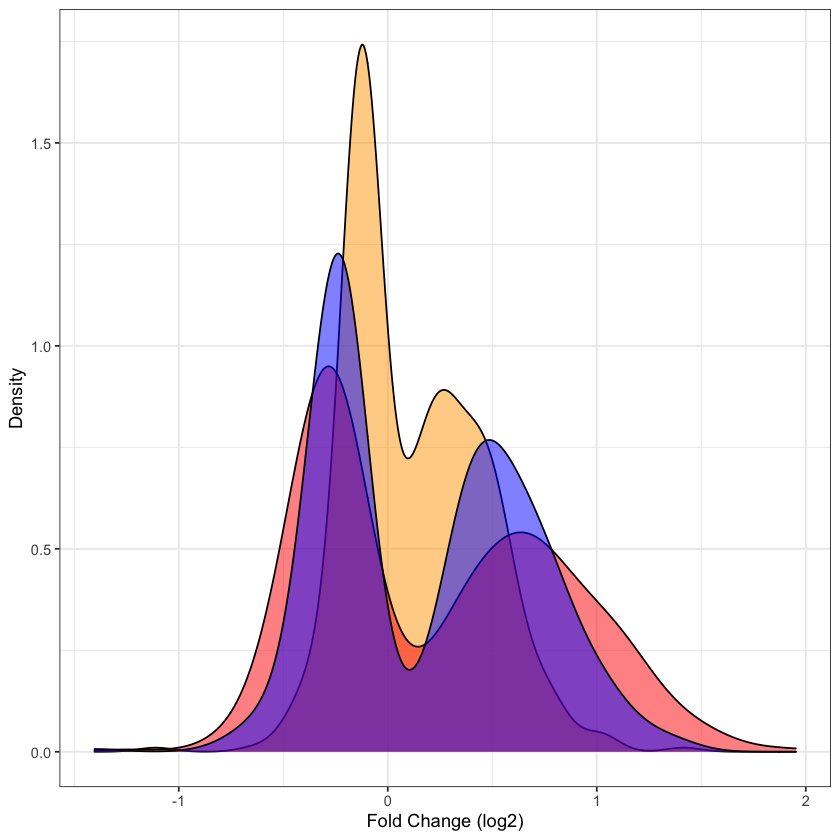

In [210]:
ggplot(protective_protein, aes(x=LFC4)) +
    geom_density(fill = "orange", alpha = 0.5) + 
    geom_density(aes(x=LFC5), data=protective_protein, fill = "red", alpha = 0.5) + 
    geom_density(aes(x=LFC45), data=protective_protein, fill = "blue", alpha = 0.5) + 
    xlab("Fold Change (log2)") + ylab("Density") +
    theme_bw()

In [211]:
protective_protein$FDR4 <- p.adjust(protective_protein$p.value4, method = "BH")
protective_protein$FDR5 <- p.adjust(protective_protein$p.value5, method = "BH")
protective_protein$FDR45 <- p.adjust(protective_protein$p.value45, method = "BH")

In [182]:
#sig_protective_protein <- protective_protein[which(protective_protein$FDR < 0.05), ]

In [216]:
#dim(protective_protein)
dim(protective_protein[which(protective_protein$FDR4 < 0.05), ])
dim(protective_protein[which(protective_protein$FDR5 < 0.05), ])
dim(protective_protein[which(protective_protein$FDR45 < 0.05), ])

[1] 64 10

[1] 27 10

[1] 451  10

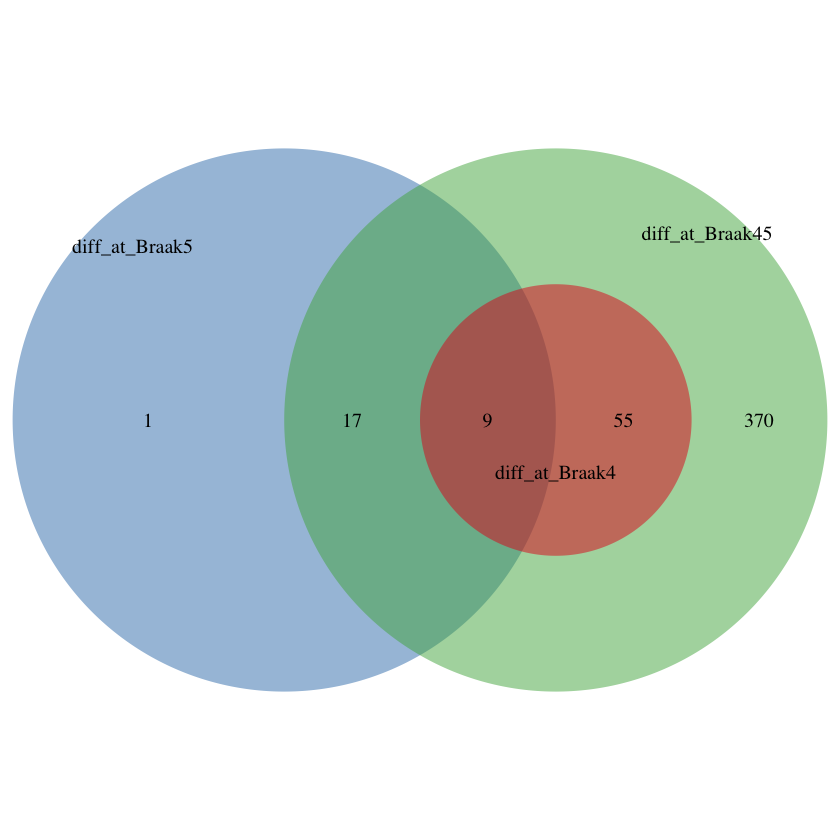

In [215]:
x <- list(Braak4 = which(protective_protein$FDR4 < 0.05), 
          Braak5 = which(protective_protein$FDR5 < 0.05), 
          Braak45 = which(protective_protein$FDR45 < 0.05))

p <- venn.diagram(x, filename = NULL, imagetype = "png", fill=c('#E41A1C', '#377EB8', '#4DAF4A'),
                  category.names=c("diff_at_Braak4","diff_at_Braak5","diff_at_Braak45"), lwd = 0, alpha = 0.5, 
                  cat.dist=c(-0.1, -0.04, -0.04),
                  width = 5, height = 5, units = 'in', res = 300)
grid.draw(p)

In [220]:
protective_protein

protein,p.value4,LFC4,p.value5,LFC5,p.value45,LFC45,FDR4,FDR5,FDR45,gene
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
SYT12,1.255272e-04,-0.36872359,0.0855883736,-0.6195903,8.099454e-09,-0.5765008,0.0118497697,0.17796349,2.012075e-07,SYT12
RPH3A,8.677643e-04,-0.47609980,0.1061752440,-0.7280991,8.275730e-08,-0.6990311,0.0214506854,0.19601304,1.502363e-06,RPH3A
VGF,7.714717e-07,-1.11039916,0.1190209694,-1.2525919,1.518009e-08,-1.4031298,0.0003641347,0.19921240,3.411905e-07,VGF
NDUFS3,1.421515e-02,-0.13855692,0.0609527461,-0.3552403,9.554152e-07,-0.2602260,0.0638939326,0.15999516,1.024900e-05,NDUFS3
PDK3,9.813535e-04,-0.26437898,0.0343344395,-0.5031052,2.006842e-09,-0.4358701,0.0214506854,0.14014041,9.472296e-08,PDK3
NDUFA12,1.570866e-02,-0.16773732,0.0846727070,-0.3063127,9.505291e-06,-0.2841359,0.0644737921,0.17796349,5.190425e-05,NDUFA12
OLFM1,1.654026e-03,-0.32946555,0.2680054308,-0.3186023,9.567097e-06,-0.4534622,0.0251838842,0.31080728,5.190425e-05,OLFM1
SLC25A11,1.663777e-01,-0.06118251,0.1481542186,-0.2636492,2.941208e-04,-0.1710970,0.2365369520,0.21321251,5.808579e-04,SLC25A11
ACTN2;ACTN3,2.145514e-04,-0.44615429,0.0278457713,-0.6227060,1.096526e-11,-0.6514821,0.0144668964,0.12917466,1.293901e-09,ACTN2


In [219]:
protective_protein$gene <- get_first_protein(protective_protein$protein)

In [221]:
save(protective_protein, file = "CEN_specific_Braak_proteins_test_res.Rdata")

## Check other subset of Braak stage 5 or 4&5 

In [33]:
protective_protein <- cbind(protein = rownames(protein_intensity_combat)[sig_index], protective_protein_res_at4)

In [34]:
colnames(protective_protein) <- c("protein", "t.p.value", "L2FC_at_stageIV")

In [35]:
protective_protein$FDR <- p.adjust(protective_protein$t.p.value, method = "BH")

In [68]:
protective_protein

protein,t.p.value,L2FC_at_stageIV,FDR
<fct>,<dbl>,<dbl>,<dbl>
SYT12,1.255272e-04,-0.35044592,0.0118497697
RPH3A,8.677643e-04,-0.42620572,0.0214506854
VGF,7.714717e-07,-1.07448648,0.0003641347
NDUFS3,1.421515e-02,-0.13213243,0.0638939326
PDK3,9.813535e-04,-0.25187849,0.0214506854
NDUFA12,1.570866e-02,-0.16797466,0.0644737921
OLFM1,1.654026e-03,-0.31266573,0.0251838842
SLC25A11,1.663777e-01,-0.05964281,0.2365369520
ACTN2;ACTN3,2.145514e-04,-0.40570020,0.0144668964


In [37]:
protective_protein[which(protective_protein$FDR < 0.05), ]

,protein,t.p.value,L2FC_at_stageIV,FDR
,<fct>,<dbl>,<dbl>,<dbl>
1,SYT12,1.255272e-04,-0.3504459,0.0118497697
2,RPH3A,8.677643e-04,-0.4262057,0.0214506854
3,VGF,7.714717e-07,-1.0744865,0.0003641347
5,PDK3,9.813535e-04,-0.2518785,0.0214506854
7,OLFM1,1.654026e-03,-0.3126657,0.0251838842
9,ACTN2;ACTN3,2.145514e-04,-0.4057002,0.0144668964
11,ACTN2,9.538698e-04,-0.3483748,0.0214506854
15,ACTN1;ACTN2;ACTN3,7.588457e-04,-0.3683653,0.0214506854
21,CAP2,6.971839e-04,-0.2501457,0.0214506854


In [38]:
summary(abs(protective_protein[which(protective_protein$FDR < 0.05), ]$L2FC_at_stageIV))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1288  0.2628  0.3750  0.4159  0.5393  1.0745 

In [79]:
#protein_list <- c("VGF", "NGEF", "CASKIN1", "SYT12", "SNAP25", "STX1A", "ARRB1",
#                  "RPH3A", "NECAB1", "CALB1;CALB2", "MLC1", "OLFM1", "OLFM3") 
#protein_list <- c("CRK", "PHACTR1", "CAP2", "LASP1", "ACTN1;ACTN2;ACTN3", 
#                  "ACTN2", "ACTN2;ACTN3", "CNN3", "EZR", "FHL1")
#protein_list <- c("CEP170B", "MAPT")
protein_list <- c("HSPB1", "STIP1", "ENO1")

In [80]:
protein_list_diff <- protective_protein[which(protective_protein$protein %in% protein_list), ]$L2FC_at_stageIV

In [81]:
protein_list_diff[which(protein_list_diff < 0)]

numeric(0)

In [82]:
summary(protein_list_diff[which(protein_list_diff > 0)])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4124  0.5410  0.6696  0.6625  0.7875  0.9054 

In [83]:
summary(protective_protein[which(protective_protein$protein %in% protein_list), ]$L2FC_at_stageIV)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4124  0.5410  0.6696  0.6625  0.7875  0.9054 

In [60]:
protective_protein_test_result <- cbind(test_result_ANOVA_and_lm_sig[, c(1, 2, 3, 4, 14, 13)], 
                                        protective_protein[, c(2, 3, 4)])

In [61]:
protective_protein_test_result

,protein,uniprot_accessions,gene,HUGO_gene,cell_type_marker,cluster,t.p.value,L2FC_at_stageIV,FDR
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
SYT12,SYT12,Q8IV01,SYT12,SYT12,,2,1.255272e-04,-0.36872359,0.0118497697
RPH3A,RPH3A,Q9Y2J0;Q9Y2J0-2;F8VP47,RPH3A,RPH3A,,2,8.677643e-04,-0.47609980,0.0214506854
VGF,VGF,O15240;Q05BJ3,VGF,VGF,InNeurons,2,7.714717e-07,-1.11039916,0.0003641347
NDUFS3,NDUFS3,O75489,NDUFS3,NDUFS3,,1,1.421515e-02,-0.13855692,0.0638939326
PDK3,PDK3,Q15120;Q15120-2,PDK3,PDK3,,1,9.813535e-04,-0.26437898,0.0214506854
NDUFA12,NDUFA12,Q9UI09;F8VRD8;F8VXI1;Q9UI09-2,NDUFA12,NDUFA12,,1,1.570866e-02,-0.16773732,0.0644737921
OLFM1,OLFM1,Q99784;Q99784-5;Q99784-3,OLFM1,OLFM1,,2,1.654026e-03,-0.32946555,0.0251838842
SLC25A11,SLC25A11,Q02978;I3L1P8;Q02978-2,SLC25A11,SLC25A11,,1,1.663777e-01,-0.06118251,0.2365369520
ACTN2;ACTN3,ACTN2;ACTN3,P35609;F6THM6;P35609-2;Q08043;A0A087WSZ2,ACTN2,ACTN2,,2,2.145514e-04,-0.44615429,0.0144668964


In [58]:
protective_protein_index <- which(protective_protein$FDR < 0.05)
length(protective_protein_index)

[1] 64

In [78]:
protective_protein_index <- protective_protein_index[order(protective_protein[protective_protein_index, ]$FDR)]

In [79]:
CEN_specific_proteins <- protective_protein_test_result[protective_protein_index, ]

In [80]:
CEN_specific_proteins

,protein,uniprot_accessions,gene,HUGO_gene,cell_type_marker,cluster,t.p.value,L2FC_at_stageIV,FDR
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
VGF,VGF,O15240;Q05BJ3,VGF,VGF,InNeurons,2,7.714717e-07,-1.1103992,0.0003641347
RPS27A;UBA52;UBB;UBC,RPS27A;UBA52;UBB;UBC,J3QS39;J3QTR3;F5H6Q2;P62987;F5GYU3;F5H2Z3;F5H265;B4DV12;F5H388;P62979;F5H747;F5GXK7;J3QKN0;Q5PY61;P0CG47;Q96C32;P0CG48;M0R1V7;Q49A90;J3QSA3;F5GZ39;M0R1M6;M0R2S1,RPS27A,RPS27A,,3,7.004242e-06,0.5130477,0.0016530011
PEX5L,PEX5L,Q8IYB4-4;Q8IYB4-5;Q8IYB4-3;Q8IYB4-6;Q8IYB4-2;Q8IYB4;Q8IYB4-8;Q8IYB4-7,PEX5L,PEX5L,,2,8.866129e-05,-0.2240109,0.0104620323
MAPT,MAPT,A0A0G2JPD5;P10636;A0A0G2JMX7;P10636-9;P10636-8;A0A0G2JQJ7;A0A0G2JS76;P10636-7;P10636-6,MAPT,MAPT,,3,8.501061e-05,0.7335626,0.0104620323
SYT12,SYT12,Q8IV01,SYT12,SYT12,,2,1.255272e-04,-0.3687236,0.0118497697
C2CD4C,C2CD4C,Q8TF44,C2CD4C,C2CD4C,,2,1.713678e-04,-0.2895005,0.0134809317
ACTN2;ACTN3,ACTN2;ACTN3,P35609;F6THM6;P35609-2;Q08043;A0A087WSZ2,ACTN2,ACTN2,,2,2.145514e-04,-0.4461543,0.0144668964
RBMX;RBMXL1,RBMX;RBMXL1,H3BR27;P38159-3;H0Y6E7;H3BT71;P38159;H3BNC1;A0A1B0GUK8;P38159-2;Q96E39,RBMX,RBMX,,5,2.567085e-04,0.6515149,0.0151457994
PHACTR1,PHACTR1,Q9C0D0;Q9C0D0-2,PHACTR1,PHACTR1,,2,2.899036e-04,-0.3505779,0.0152038310


In [724]:
save(CEN_specific_proteins, file = "CEN_specific_proteins_update_Braak.Rdata")

In [725]:
write.table(CEN_specific_proteins, 
            "100_plus_results/Sig_results_from_analysis/CEN-specific Braak stage-related proteins (t_test)-20220731.tsv",
            row.names = FALSE, quote = FALSE, sep = "\t")

In [103]:
protective_protein_index <- which(protective_protein$FDR < 0.05)

In [104]:
protective_protein_index <- protective_protein_index[order(protective_protein[protective_protein_index, ]$FDR)]

In [60]:
protein_info[protective_protein_index, ]

,protein,uniprot_accessions,gene,HUGO_gene
,<chr>,<chr>,<chr>,<chr>
878,VGF,O15240;Q05BJ3,VGF,VGF
2233,RPS27A;UBA52;UBB;UBC,J3QS39;J3QTR3;F5H6Q2;P62987;F5GYU3;F5H2Z3;F5H265;B4DV12;F5H388;P62979;F5H747;F5GXK7;J3QKN0;Q5PY61;P0CG47;Q96C32;P0CG48;M0R1V7;Q49A90;J3QSA3;F5GZ39;M0R1M6;M0R2S1,RPS27A,RPS27A
221,PEX5L,Q8IYB4-4;Q8IYB4-5;Q8IYB4-3;Q8IYB4-6;Q8IYB4-2;Q8IYB4;Q8IYB4-8;Q8IYB4-7,PEX5L,PEX5L
2719,MAPT,A0A0G2JPD5;P10636;A0A0G2JMX7;P10636-9;P10636-8;A0A0G2JQJ7;A0A0G2JS76;P10636-7;P10636-6,MAPT,MAPT
21,SYT12,Q8IV01,SYT12,SYT12
933,C2CD4C,Q8TF44,C2CD4C,C2CD4C
500,ACTN2;ACTN3,P35609;F6THM6;P35609-2;Q08043;A0A087WSZ2,ACTN2,ACTN2
2557,RBMX;RBMXL1,H3BR27;P38159-3;H0Y6E7;H3BT71;P38159;H3BNC1;A0A1B0GUK8;P38159-2;Q96E39,RBMX,RBMX
484,PHACTR1,Q9C0D0;Q9C0D0-2,PHACTR1,PHACTR1


In [66]:
#CEN_specific_proteins_old <- protective_protein[protective_protein_index, ]
#
#CEN_specific_proteins_old$gene <- get_first_protein(CEN_specific_proteins_old$protein)
#
#CEN_specific_proteins_old[,c(1, 4, 2, 3)]

In [52]:
comparison_table <- data.frame(protein = CEN_specific_proteins$protein)

In [54]:
comparison_table$in_old_result <- ""

In [55]:
comparison_table[which(comparison_table$protein %in% CEN_specific_proteins_old$protein), ]$in_old_result <- "Yes"

In [57]:
comparison_table$in_new_result <- "Yes"

In [58]:
rownames(comparison_table) <- seq(1, nrow(comparison_table))

In [74]:
comparison_table[13:64, ]

,protein,in_old_result,in_new_result
,<fct>,<chr>,<chr>
13,FUBP1;FUBP3,,Yes
14,RPH3A,Yes,Yes
15,PDK3,,Yes
16,ACTN2,Yes,Yes
17,ACTN1;ACTN2;ACTN3,Yes,Yes
18,CAP2,,Yes
19,OLFM3,Yes,Yes
20,STX1A,,Yes
21,CSRP1,,Yes


In [167]:
#protective_protein_index <- sig_index[protective_protein_index]

In [36]:
#Cen_specific_Braak_protein <- protein_info[protective_protein_index, ]

In [38]:
#Cen_specific_Braak_protein$Log2_FC <- pathology_related_proteins_ANOVA[protective_protein_index, ]$effect_size

In [ ]:
#Cen_specific_Braak_protein$p.value <- pathology_related_proteins_ANOVA[protective_protein_index, ]$p.value

In [114]:
write.table(CEN_specific_proteins[,c(1, 5, 2, 3, 4)], 
            file = "Temp_results/Centenarian_specific_Braak_related_proteins_updatedBraak.tsv", sep = '\t',
            col.names = TRUE, row.names = FALSE, quote = FALSE)

In [117]:
protein_list <- as.character(unique(CEN_specific_proteins$gene))
    
#cat("this is cluster", i, end = "\n")
print(length(protein_list))

geneList <- factor(as.integer(backgroud_protein_list %in% protein_list))
    names(geneList) <- backgroud_protein_list

sigGOID <- NULL

sigRes_BP <- GOterm_query_test_table(protein_list, geneList, "BP")
print(sigRes_BP)

[1] 63



Building most specific GOs .....
	( 6506 GO terms found. )

Build GO DAG topology ..........
	( 10549 GO terms and 24620 relations. )

Annotating nodes ...............
	( 2945 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 2199 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "Can not find significant GO pathway in this cluster!"


In [25]:
load(file = "Temp_results/protein_clust.Rdata")
load(file = "CEN_specific_proteins_update_Braak.Rdata")

In [26]:
protein_clust_cent <- subset(protein_clust, protein %in% CEN_specific_proteins$protein)

In [27]:
table(protein_clust$clust)


  1   2   3   4   5   6 
 94 132  83  40  43  80 

In [28]:
table(protein_clust_cent$clust)


 1  2  3  4  5  6 
 7 28  8  6  8  7 

In [29]:
subset(protein_clust_cent, clust == 6)

,protein,clust,gene,HUGO_gene,celltype
,<fct>,<dbl>,<fct>,<chr>,<fct>
243,EZR,6,EZR,EZR,NA
257,BDH2,6,BDH2,BDH2,Astrocytes
311,ENO1,6,ENO1,ENO1,NA
380,SERPINB6,6,SERPINB6,SERPINB6,NA
387,SERPINB1;SERPINB9,6,SERPINB1,SERPINB1,Microglia
404,FUBP1;FUBP3,6,FUBP1,FUBP1,NA
469,CALB1;CALB2,6,CALB1,CALB1,InNeurons


In [140]:
protein_clust$inC2 <- 0
protein_clust[which(protein_clust$clust == 2), ]$inC2 <- 1

In [141]:
protein_clust$inCENT <- 0
protein_clust[which(protein_clust$protein %in% CEN_specific_proteins$protein), ]$inCENT <- 1

In [142]:
table(protein_clust$inCENT)
table(protein_clust$inC2)


  0   1 
408  64 


  0   1 
340 132 

In [143]:
chisq.test(protein_clust$inC2, protein_clust$inCENT, correct=FALSE)


	Pearson's Chi-squared test

data:  protein_clust$inC2 and protein_clust$inCENT
X-squared = 9.1563, df = 1, p-value = 0.002479


In [130]:
for(i in 1:max(protein_clust_cent$clust)){
    
    protein_list <- as.character(unique(subset(protein_clust_cent, clust == i)$gene))
    
    cat("this is cluster", i, end = "\n")
    print(length(protein_list))
    
    geneList <- factor(as.integer(backgroud_protein_list %in% protein_list))
        names(geneList) <- backgroud_protein_list
    
    sigGOID <- NULL
    
    sigRes_BP <- GOterm_query_test_table(protein_list, geneList, "BP")
    print(sigRes_BP)
}

this is cluster 1 
[1] 7



Building most specific GOs .....
	( 6506 GO terms found. )

Build GO DAG topology ..........
	( 10549 GO terms and 24620 relations. )

Annotating nodes ...............
	( 2945 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 376 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "Can not find significant GO pathway in this cluster!"
this is cluster 2 
[1] 27



Building most specific GOs .....
	( 6506 GO terms found. )

Build GO DAG topology ..........
	( 10549 GO terms and 24620 relations. )

Annotating nodes ...............
	( 2945 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 1097 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "Can not find significant GO pathway in this cluster!"
this is cluster 3 
[1] 8



Building most specific GOs .....
	( 6506 GO terms found. )

Build GO DAG topology ..........
	( 10549 GO terms and 24620 relations. )

Annotating nodes ...............
	( 2945 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 851 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "Can not find significant GO pathway in this cluster!"
this is cluster 4 
[1] 6



Building most specific GOs .....
	( 6506 GO terms found. )

Build GO DAG topology ..........
	( 10549 GO terms and 24620 relations. )

Annotating nodes ...............
	( 2945 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 668 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "Can not find significant GO pathway in this cluster!"
this is cluster 5 
[1] 8



Building most specific GOs .....
	( 6506 GO terms found. )

Build GO DAG topology ..........
	( 10549 GO terms and 24620 relations. )

Annotating nodes ...............
	( 2945 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 833 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "Can not find significant GO pathway in this cluster!"
this is cluster 6 
[1] 7



Building most specific GOs .....
	( 6506 GO terms found. )

Build GO DAG topology ..........
	( 10549 GO terms and 24620 relations. )

Annotating nodes ...............
	( 2945 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 715 nontrivial nodes
		 parameters: 
			 test statistic: fisher


[1] "Can not find significant GO pathway in this cluster!"


In [69]:
protein_intensity_combat[protective_protein_index,]

,intensity_20190325_121_S16_020_CHC_011,intensity_20190325_125_S16_044_CHC_007,intensity_20190325_127_S16_094_CHC_004,intensity_20190325_16_04_037_AD_008,intensity_20190325_183_S10_292_AD_010,intensity_20190325_194_S02_055_ND_005,intensity_20190325_31_01_184_AD_006,intensity_20190325_57_S97_235_AD_003,intensity_20190325_77_S11_072_ND_012,intensity_20190325_79_S07_308_ND_009,⋯,intensity_20190507_21_01_032_AD_221,intensity_20190507_27_00_204_AD_211,intensity_20190507_29_S99_240_AD_219,intensity_20190507_30_S05_040_AD_209,intensity_20190507_63_04_027_AD_217,intensity_20190507_72_S99_219_AD_213,intensity_20190606_106_NABCA14_08_ND_RERUN,intensity_20190606_140_2017_027_CHC_RERUN,intensity_20190606_20_S00_166_AD_RERUN,intensity_20190606_9_S93_025_AD_RERUN
VGF,9.028795,8.212542,8.444166,6.808029,6.096439,8.547945,6.121205,6.564122,7.897251,7.815185,⋯,7.453859,7.201037,7.107234,6.866307,5.910609,6.421656,7.832790,6.419410,8.186533,6.732397
RPS27A;UBA52;UBB;UBC,8.824246,8.914419,9.033334,10.120256,10.814797,9.130531,10.577762,10.238393,8.868845,9.115085,⋯,9.525775,10.350137,10.645910,9.565354,9.883397,10.103335,9.058267,9.546215,9.598521,10.902577
PEX5L,8.831193,8.817545,8.842980,8.348493,8.344700,8.802701,8.473014,8.315785,8.882944,8.734914,⋯,8.791862,8.429345,8.531997,8.399791,8.343351,8.695962,8.533201,8.590363,8.902983,8.182427
MAPT,11.960107,12.210970,12.726661,13.906163,14.137620,12.156568,13.671383,13.596783,11.665204,11.642384,⋯,12.748579,13.333164,14.457404,12.756079,13.088982,14.112985,12.436890,12.819837,12.670831,14.277606
SYT12,10.314867,10.164266,10.006696,9.224376,8.720087,10.314941,9.073226,9.110123,9.948933,9.675279,⋯,9.598356,9.235518,9.682421,9.297045,8.952027,9.324016,10.073551,9.292096,9.883401,9.098879
C2CD4C,7.022225,7.087529,6.811120,6.634522,5.868211,7.088536,6.233737,6.179227,6.818393,6.582241,⋯,6.467756,6.165472,6.553474,7.010886,6.368095,6.252969,6.776306,7.082594,6.795878,6.281405
ACTN2;ACTN3,8.298511,8.068516,7.499954,7.406696,6.602609,8.436591,6.859764,7.175907,7.895488,7.651344,⋯,7.435024,7.231162,7.472035,7.728968,7.116397,6.875024,8.009423,7.441740,7.581691,7.039054
RBMX;RBMXL1,7.230093,7.876176,8.836541,8.212719,8.194199,6.952516,8.285942,8.408542,7.941121,8.234481,⋯,8.034039,8.258976,8.110107,8.516754,8.323068,8.377097,8.314023,8.393469,8.397189,8.431490
PHACTR1,7.840826,7.697867,7.571792,8.008039,6.566743,8.478882,6.942499,7.336980,8.000188,7.667910,⋯,7.772796,7.505484,7.285015,8.002704,7.199730,7.056651,7.685267,7.578248,7.736258,7.384392
LPCAT4,7.176005,7.377770,7.418122,6.388566,6.419563,7.283389,6.616607,6.758215,7.367926,7.028571,⋯,6.841788,6.745036,6.632105,6.567131,6.871371,6.989509,7.236205,6.544878,7.072347,6.827074


In [66]:
protein_list <- as.character(unique(get_first_protein(protective_protein[which(protective_protein$adj.p_value < 0.05), ]$protein)))
print(length(protein_list))
geneList <- factor(as.integer(backgroud_protein_list %in% protein_list))
names(geneList) <- backgroud_protein_list

[1] 13


In [70]:
allRes <- GOterm_query_test_table(protein_list, geneList, "BP")


Building most specific GOs .....
	( 6550 GO terms found. )

Build GO DAG topology ..........
	( 10581 GO terms and 24692 relations. )

Annotating nodes ...............
	( 3044 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 912 nontrivial nodes
		 parameters: 
			 test statistic: fisher


In [71]:
allRes

GO.ID,Term,Annotated,Significant,Expected,Fisher,FDR,proteins
GO:1902680,positive regulation of RNA biosynthetic ...,162,4,0.64,0.0027,1,"ACTN1, ACTN2, RBMX, RPS27A"
GO:1903508,positive regulation of nucleic acid-temp...,162,4,0.64,0.0027,1,"ACTN1, ACTN2, RBMX, RPS27A"
GO:0006625,protein targeting to peroxisome,21,2,0.08,0.0029,1,"PEX5L, RPS27A"
GO:0043574,peroxisomal transport,21,2,0.08,0.0029,1,"PEX5L, RPS27A"
GO:0072662,protein localization to peroxisome,21,2,0.08,0.0029,1,"PEX5L, RPS27A"
GO:0072663,establishment of protein localization to...,21,2,0.08,0.0029,1,"PEX5L, RPS27A"
GO:0048167,regulation of synaptic plasticity,88,3,0.35,0.0043,1,"MAPT, SYT12, VGF"
GO:0007031,peroxisome organization,26,2,0.10,0.0044,1,"PEX5L, RPS27A"
GO:0051254,positive regulation of RNA metabolic pro...,185,4,0.73,0.0044,1,"ACTN1, ACTN2, RBMX, RPS27A"
GO:0007267,cell-cell signaling,490,6,1.93,0.0065,1,"MAPT, PCSK1, RPH3A, RPS27A, SYT12, VGF"


In [69]:
for (i in protein_list)
    cat(i, end = "\n")

SYT12 
RPH3A 
VGF 
ACTN2 
ACTN1 
OLFM3 
PCSK1 
PEX5L 
KIAA1586 
C2CD4C 
MAPT 
RPS27A 
RBMX 


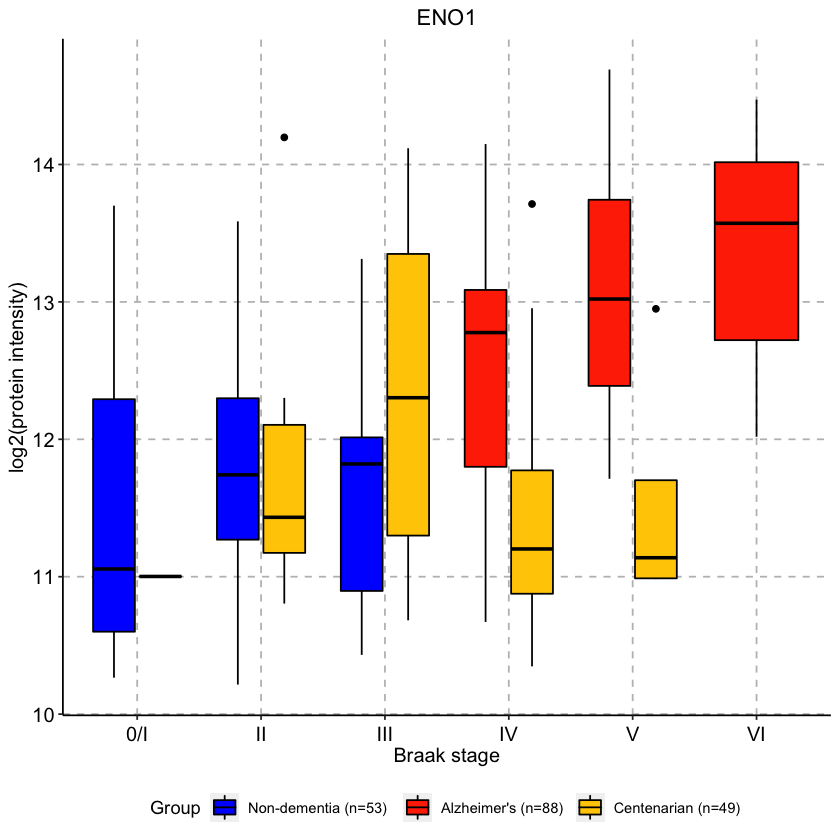

In [94]:
temp_prot <- data.frame(Braak = as.factor(metadata$fBraak),
                        group = as.character(metadata$GROUP),
                        intensity = as.numeric(protein_intensity_combat[sig_index[311],]))
temp_prot$group <- factor(temp_prot$group, levels=c("ND", "AD", "CHC"))

xlabels <- sort(unique(temp_prot$Braak))
legend_p <- ggplot(temp_prot, aes(x = Braak, y = intensity, fill = group))+
    geom_boxplot(color = "black") +
    xlab("Braak stage") +
    ylab("log2(protein intensity)") +
    ggtitle(rownames(protein_intensity_combat)[sig_index[311]]) +
    scale_x_discrete(breaks=xlabels, labels = c("0/I", "II", "III", "IV", "V", "VI")) +

    scale_fill_manual(name="Group", breaks = c("ND", "AD", "CHC"), 
                      values = c(color_ND, color_AD, color_CHC_M), 
                      labels = c("Non-dementia (n=53)", 
                                 "Alzheimer's (n=88)",
                                 "Centenarian (n=49)"))+

    theme(#plot.background = element_rect(),    # Background of the entire plot
      panel.background = element_rect(fill = "white"),   # Background of plotting area
      #panel.border = element_rect(),       # Border around plotting area.
                                           # fill argument should be NA
      legend.position="bottom",

      panel.grid.major.x = element_line(size = 0.5, linetype = 'dashed',
                            color = "gray"), # Vertical major grid lines
      panel.grid.major.y = element_line(size = 0.5, linetype = 'dashed',
                            color = "gray"), # Horizontal major grid lines
      panel.grid.minor.x = element_line(), # Vertical minor grid lines
      panel.grid.minor.y = element_line(),  # Vertical major grid lines
    
      plot.title = element_text(hjust = 0.5),
      axis.title.x = element_text(color = "black", size = 12),
      axis.title.y = element_text(color = "black", size = 12),
      
      axis.text.x = element_text(size = 12, color = "black", 
                                 vjust = 0.5, hjust = 0.5),
      axis.text.y = element_text(size = 12, color = "black"),
      
      axis.line = element_line(size = 0.5, linetype = "solid",
                               colour = "black")
     )
legend_p

In [118]:
plot_protective_proteins <- function(index){
    temp_prot <- data.frame(Braak = as.factor(metadata$fBraak),
                            group = as.character(metadata$GROUP),
                            intensity = as.numeric(protein_intensity_combat[sig_index[index],]))
    temp_prot$group <- factor(temp_prot$group, levels=c("ND", "AD", "CHC"))
    
    p_value <- protective_protein[index, ]$FDR
    
    if(p_value < 0.01){
        test_label <- paste(#paste("R =", round(R, 3)), paste(
                        "italic('P') <~", round(0.01, 2), sep = "")
        
    }else{
        test_label <- paste(#paste("R =", round(R, 3)), paste(
                        "italic('P')~`=`~", round(p_value, 2))#, sep = ", ")
    }
    
    xlabels <- sort(unique(temp_prot$Braak))
    p <- ggplot(temp_prot, aes(x = Braak, y = intensity))+
        geom_boxplot(aes(fill = group), color = "black") + 
        #stat_boxplot(aes(fill = group), geom ='errorbar') +
        xlab("Braak stage") +
        ylab("Abundance (log2)") +
        ggtitle(rownames(protein_intensity_combat)[sig_index[index]]) +
        scale_x_discrete(breaks=xlabels, labels = c("0/I", "II", "III", "IV", "V", "VI")) +
    
        scale_fill_manual(name="Group", breaks = c("ND", "AD", "CHC"), 
                           values = c(color_ND, color_AD, color_CHC_M))+
    
        geom_text(data = data.frame(Braak = c(4),group = c("AD", "CHC"),
                                    intensity = c(max(temp_prot$intensity) + (max(temp_prot$intensity) - min(temp_prot$intensity))/100 * 5)), 
                  label = test_label, size = 2.5, parse = TRUE) + 
        geom_line(data = data.frame(x=c(3.82, 3.82, 4.18, 4.18), 
                                    y=c(max(temp_prot$intensity)-(max(temp_prot$intensity) - min(temp_prot$intensity))/100 * 3, 
                                        max(temp_prot$intensity), 
                                        max(temp_prot$intensity), 
                                        max(temp_prot$intensity)-(max(temp_prot$intensity) - min(temp_prot$intensity))/100 * 3)), 
                                    aes(x=x, y=y), lty = 1) +
    
    
        theme(#plot.background = element_rect(),    # Background of the entire plot
          panel.background = element_rect(fill = "white"),   # Background of plotting area
          panel.border = element_rect(color = "black", size = 0.5, fill=NA),       # Border around plotting area.
                                               # fill argument should be NA
            
          legend.position='none',
  
          #panel.grid = element_line(),         # All grid lines
          #panel.grid.major = element_line(),   # Major grid lines
          #panel.grid.minor = element_line(),   # Minor grid lines
  
          panel.grid.major.x = element_line(), #element_line(size = 0.5, linetype = 'dashed',
                                #color = "gray"), # Vertical major grid lines
          panel.grid.major.y = element_line(), #element_line(size = 0.5, linetype = 'dashed',
                                #color = "gray"), # Horizontal major grid lines
          panel.grid.minor.x = element_line(), # Vertical minor grid lines
          panel.grid.minor.y = element_line(),  # Vertical major grid lines
        
          plot.title = element_text(hjust = 0.5, size = 9),
          axis.title.x = element_text(color = "black", size = 10),
          axis.title.y = element_text(color = "black", size = 10),
          
          axis.text.x = element_text(size = 8, color = "black", 
                                     vjust = 0.5, hjust = 0.5),
          axis.text.y = element_text(size = 8, color = "black"),
          
          #axis.line = element_line(size = 0.5, linetype = "solid",
          #                        colour = "black")
         )
    return(p)
    
}

In [119]:
protective_protein_plot <- list()

In [121]:
protein_index <- protective_protein_index

In [122]:
for(i in 1:length(protein_index)){

    p <- plot_protective_proteins(protein_index[i])
    #print(p)
    protective_protein_plot[[i]] <- p
}
protective_protein_plot[[i+1]] <- get_legend(legend_p)

In [125]:
p <- plot_grid(plotlist = c(protective_protein_plot[1:64]), 
               ncol = 4, nrow = 16, align = "vh", axis = "lrtb")

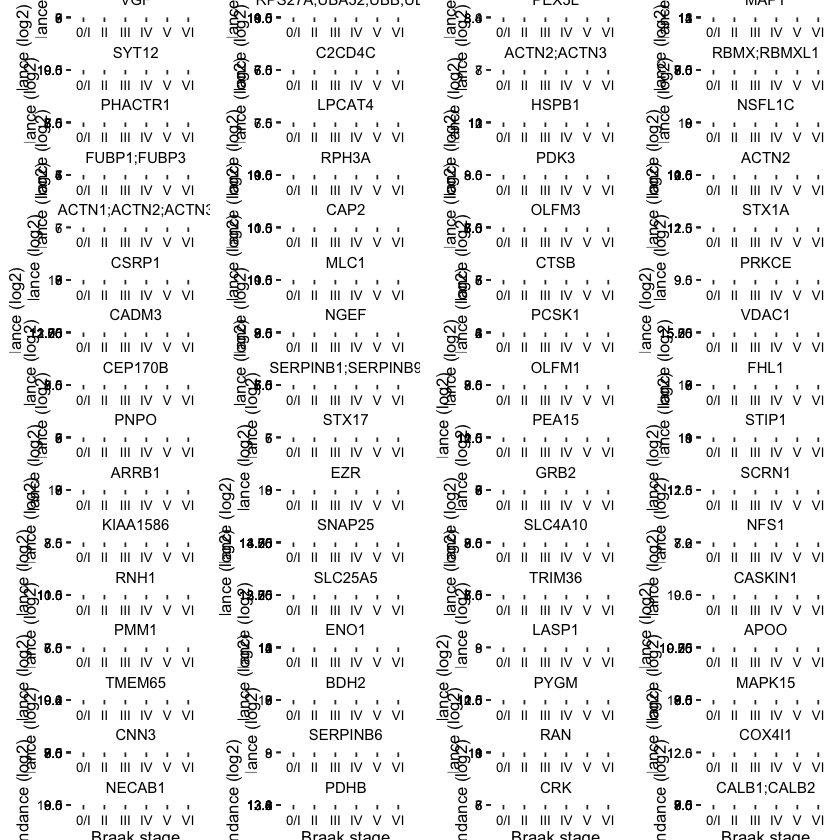

In [126]:
p

In [131]:
p_legend <- plot_grid(
  p, protective_protein_plot[[65]],
  ncol = 1,
  # rel_heights values control vertical title margins
  rel_heights = c(1, 0.008)
)

In [132]:
save_plot("100_plus_plots/proteomics/protective_protein_plot_clean_64_orderPvalue_20230413.pdf", 
          p_legend, limitsize = FALSE,
          base_height = 40, base_width = 10)

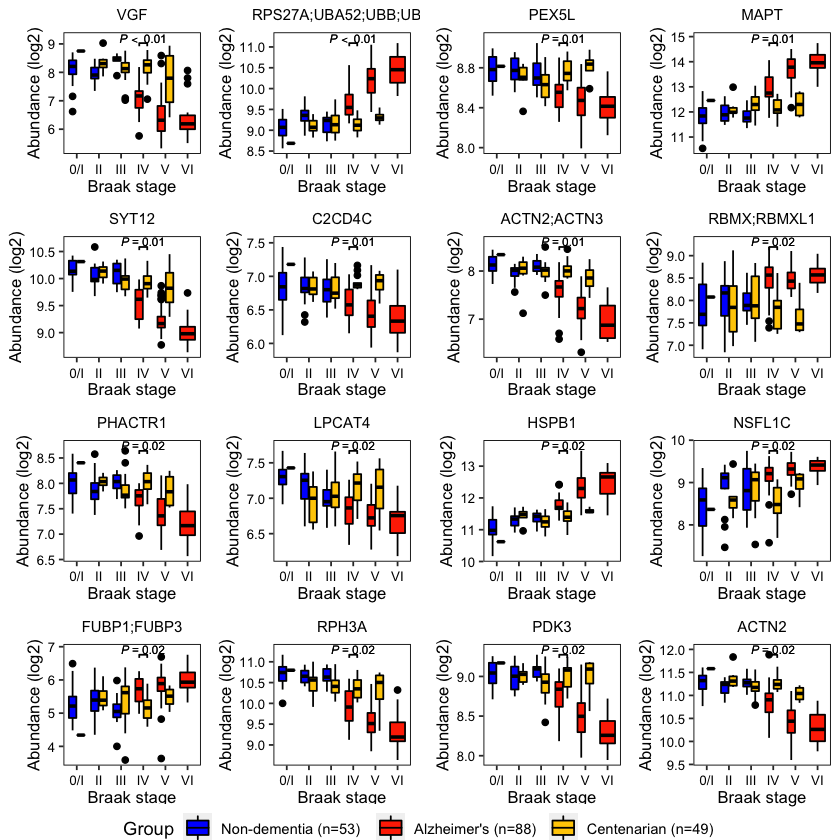

In [137]:
p_for_main_paper <- plot_grid(plotlist = protective_protein_plot[c(1:16)], 
               ncol = 4, align = "vh", axis = "lrtb")

p_with_legend_for_main_paper <- plot_grid(
  p_for_main_paper, protective_protein_plot[[65]],
  ncol = 1,
  # rel_heights values control vertical title margins
  rel_heights = c(1, 0.03)
)

p_with_legend_for_main_paper
#p_for_main_paper

In [138]:
save_plot("100_plus_plots/proteomics/protective_protein_plot_top15_orderPvalue_for_main_paper-20230413.pdf", 
          p_with_legend_for_main_paper, limitsize = FALSE,
          base_height = 8, base_width = 8)